# Init

In [440]:
import ast
import pandas as pd
import numpy as np
import utils
import os
import getpass
from datetime import date
import datetime 
import json
import time
import sys
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('fivethirtyeight')
%load_ext autoreload
%autoreload 2

username = getpass.getuser()

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from IPython.core.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 80%; }
    div#menubar-container     { width: 60%; }
    div#maintoolbar-container { width: 70%; }
    div.output_scroll { height: 60em; }
</style>
"""))

In [441]:
data_path = 'data'
data_path = '/Users/gadir'

if not os.path.exists(data_path):
    os.makedirs(data_path)
    

# Functions
## Helpers

In [442]:
def query_short(q):
    conn = pyodbc.connect('DSN=Redshift_live')
    df = pd.read_sql(q, conn)
    conn.close()
    return df

windows_connection_name = 'DSN=Redshift_live'

import platform
import json
import datetime

def query(q):
#     if platform.system() == 'Windows':
#         conn = pyodbc.connect(windows_connection_name)
#     elif platform.system() == 'Darwin':
#         with open(mac_redshift_user_file) as fh:
#             creds = json.loads(fh.read())  
#         conn = ('postgresql+psycopg2://' + \
#             creds['user_name'] + ':' + creds['password'] + '@' + \
#             creds['host_name'] + ':' + creds['port_num'] + '/' + creds['db_name'])
#     else: ##Returns the system/OS name, such as 'Linux', 'Darwin', 'Java', 'Windows'. An empty string is returned if the value cannot be determined.
#         return null
            
    print("query started at: {0}".format(datetime.datetime.now().time()))
    df = pd.read_sql(q, conn, chunksize = None)
    print("query ended at: {0}".format(datetime.datetime.now().time()))    
    conn.close()
    return df


import scipy.stats as st
alpha = 0.95 #significance_level

def ttest_2(a,b):
    return st.ttest_ind(a,b, equal_var=False)

def ci(a, alpha):
    t = st.t.interval(alpha, len(a)-1, loc=np.mean(a), scale=st.sem(a))
    return (t[1] - t[0])/2

def list_to_string(lst):
    s = ",".join(map(str, lst))   
    return s

def string_list_to_string(lst):
    s = "'"+"','".join(map(str, lst))+"'"   
    return s


# Get COHORTS

In [5]:
conf_template = {'city': '',
 'country': '',
 #'rfm_calculation_date': '2020-06-14',
 #'alive_week_date': '2020-06-15',
 'de_discount_start_date': ''
 #'de_discount_end_date': '2020-06-23',
 #'de_holdout_start_date': '2020-06-23',
 #'de_holdout_end_date': '2020-06-30',
 #'test_name': 'simulation_za_Durban_2020-06-16_2020-06-22',
 #'experiment_group_column': 'discount',
 #'slice_cols': ['cohort'],
 #'city_test_ids': [7099, 7097, 7096, 7095, 7094, 7093],
 #'city_control_treatment_ids': [13562, 13567, 13574, 13581, 13588, 13595],
 #'city_treatment_share': 2,
 #'city_n_treatments': 4,
 #'additional_sql_enrollment_selection': '',
 #'use_holdout_targeting': 0
}

In [446]:
cities = ["Durban"]
countries = ["za"]
weeks = ["2020-12-02"]

In [447]:
i = 0

for city in cities:

    country = countries[i]
    i=i+1
    
    for w in weeks:
        if True:
            conf = conf_template
            conf["city"] = city
            conf["country"] = country
            conf["de_discount_start_date"] = w

            print('{} {} {}'.format(city, w ,datetime.datetime.now().time()))

            ##get cohorts
            dfc = utils.get_cohorts_etl(conf, data_path, overwrite_file = False)

    #         ##get session cohorts
    #         dfcs = utils.get_cohorts_sessions(conf, data_path, overwrite_file = True)

    #         ## get lifetime activity
    #         dfla = utils.get_lifetime_activity(conf, data_path)

    #         ## get RFMv1 cohorts
    #         dfc1 = utils.get_cohorts_rfmv1(conf, data_path, overwrite_file = True)

#             ## get alive probability
#             dfap = utils.get_alive_probability(conf, data_path, overwrite_file = False)

    #         ##get cherrypickers
    #         dfch = utils.get_cherrypickers(conf, data_path)

    #         ##get profitability
    #         dfp = utils.get_profit(conf, data_path)

    #         ##get activity
    #         dfa = utils.get_activity(conf, data_path)


Durban 2020-12-02 10:35:53.941984
Querying cohort ETL data from Redshift...
query started at: 10:35:54.424190
query ended at: 10:36:46.198447


# Single week analysis

In [8]:
city = "Durban"
country = "za"

#Mondays:
w = "2020-11-30"


In [438]:
dfc.head()

,method,period,city,country,cohort,user_id
0,rfmv2,2020-11-30,Durban,za,highest_activity,652645
1,rfmv2,2020-11-30,Durban,za,highest_activity,946747
2,rfmv2,2020-11-30,Durban,za,highest_activity,952676
3,rfmv2,2020-11-30,Durban,za,not_active_last_4_month,1031833
4,rfmv2,2020-11-30,Durban,za,not_active_last_4_month,1040729


In [451]:
dfc.count()

method     974217
period     974217
city       974217
country    974217
cohort     974217
user_id    974217
dtype: int64

In [10]:
i = 0


conf = conf_template
conf["city"] = city
conf["country"] = country
conf["de_discount_start_date"] = w

##get cohorts
#filename = 'de_cohorts_{}_{}.csv.gz'.format(conf['city'], conf['de_discount_start_date'])
filename = 'de_cohorts_etl_{}_{}.csv.gz'.format(conf['city'], conf['de_discount_start_date'])

dfe = pd.read_csv('{}/{}'.format(data_path, filename), sep=',')
dfe = dfe.rename(columns = {"city_name":"city"})



# Campaign efficiency 
## Get Data
### SQL string

In [75]:
sql = """

with s as (
	select 
    '{0}'::date as dt_start, --campaign start day
	'{1}'::date as dt_end, --campaign end day
	'{2}' as city
)
,
cities as (
	select 
		id,
		country_code
	from admin_system_city c 
	where name = (select city from s)
)
,
users as (
SELECT 
	t.id as test_id,
	t.name as test_name,
	e.user_id,
	e.created AS enrollment_created,
	case when tr.bonus_type = 'targeted_control_campaign' THEN 'control' ELSE 'treatment' END AS treatment_type,
	case when tr.bonus_type = 'targeted_control_campaign' THEN 1 ELSE 0 END AS is_control,
	json_extract_path_text(tr.bonus_data,'targeted_campaign_id') targeted_campaign_id_str,
	case when targeted_campaign_id_str ='' then null else targeted_campaign_id_str::int end as targeted_campaign_id,
    c.name as campaign_name,
	json_extract_path_text(c.bonus_data,'percentage') campaign_percentage,
	json_extract_path_text(c.bonus_data,'max_value') campaign_max_value,
	case when hu.user_id is null then 0 else 1 end as is_in_holdout,
	h."start" as holdout_start,
	h."end" as holdout_end
FROM public.campaign_targeting_test t 
left join public.campaign_targeting_treatment tr on tr.test_id = t.id
LEFT JOIN public.campaign_targeting_enrollment e on e.treatment_id = tr.id
left join campaign_targeted_campaign c on c.id = case when json_extract_path_text(tr.bonus_data,'targeted_campaign_id') ='' then null else json_extract_path_text(tr.bonus_data,'targeted_campaign_id')::int end
left join campaign_targeting_holdout_treatment ht on ht.treatment_id = tr.id 
left join campaign_targeting_holdout_user hu on e.user_id = hu.user_id and hu.holdout_id = ht.holdout_id and hu.released is null
left join campaign_targeting_holdout h on h.id = hu.holdout_id and h.released is null
where 
	date_trunc('week',t.created)::date = (select date_trunc('week',dt_start)::date from s)
	AND e.state = 'finished' --enrollments without error
	AND e.no = 1 --get only the first enrollment
	
    and t.name ilike '%unlockable%'
    and tr.distribution = 4
    --and t.city_id = (select id from cities)
)
,
hp_end as (select max(holdout_end) hp_end from users)
,
orders as (
	SELECT DISTINCT
		company_order_search_filter__filter_search_category_id AS category,
		company_order__id AS order_id,
		company_order_try__driver_id AS driver_id,
		company_order__user_id AS user_id,
		company_order__country country,
		
		company_order__state AS o_state,
		company_order__created o_created,
		
		company_order_try__id as ot_id,
		company_order_try__state AS ot_state,
		company_order_try__created ot_created,
		--DATE_TRUNC('hour', company_order_try__created) AS date_hour,
			
		COALESCE(company_order_try__ride_price/cr.rate,0) ride_price,
		COALESCE(company_order_try__price/cr.rate,0) price,
		ride_price - (case when tcc.order_try_id is null then ride_price else price end) as discount, --discount from signup campaigns under analysis
		ride_price - price as discount_all, --all discounts, including GGs, other campaigns, compensations etc
		
		company_order_try__retry_to_try,
		
		case 
			when v.company_order_try__created::date <= (select dt_end from s) then 'dp' 
			when u.is_in_holdout = 1 and v.company_order_try__created <= u.holdout_end then 'hp'
			else 'other'
		end as period_type
	
	FROM etl_search_denormalized_view v
	INNER JOIN users u ON u.user_id = v.company_order__user_id --select only users in the sample
	LEFT JOIN vw_currency_exchange_rates cr ON 
	            (company_order_try__price_currency = cr.currency) 
	            AND DATE(cr.valid_on) = DATE(company_order_try__created)
	LEFT JOIN (select * from campaign_targeted_campaign_code_usage tcc where tcc.targeted_campaign_id IN (select distinct t.targeted_campaign_id from users t where t.targeted_campaign_id is not null)
				) tcc on 
	    			tcc.order_try_id = v.company_order_try__id 
	    			AND tcc.user_id = v.company_order__user_id
	WHERE 
		v.company_order_try__created::date >= (SELECT dt_start FROM s) --global monitoring period 
		AND v.company_order_try__created::date <= greatest((SELECT dt_end FROM s),(select hp_end from hp_end)) --global monitoring period, max from camapign or holdout end
		AND v.company_order__city_id in (SELECT id FROM cities)
		AND v.company_order__country in (SELECT country_code FROM cities)
		AND company_order_try__state = 'finished'
		AND v.company_order__state = 'finished'
		AND company_order_try__retry_to_try is null
		AND not nvl(duplicate_order, false) 
)
,
orders_agg AS (
	SELECT 
		o.user_id, 
		o.period_type,
		min(o.ot_created) as first_order_created, 
		count(o.order_id) as finished_order_count,
		sum(o.ride_price) ride_price,
		sum(o.price) price,
		sum(o.discount) discount,
		sum(o.discount_all) discount_all
	FROM orders o 
	where o.period_type = 'dp'
	group by o.user_id, o.period_type
)
,
orders_agg_hp AS (
	SELECT 
		o.user_id, 
		o.period_type,
		min(o.ot_created) as first_order_created, 
		count(o.order_id) as finished_order_count,
		sum(o.ride_price) ride_price,
		sum(o.price) price,
		sum(o.discount) discount,
		sum(o.discount_all) discount_all
	FROM orders o 
	where o.period_type = 'hp'
	group by o.user_id, o.period_type
)
,
users_activity AS (
	SELECT 
	
		--user details
		u.user_id,
		u.test_id,
		u.test_name,
        u.campaign_name,
		u.treatment_type,
		u.is_control,
		u.targeted_campaign_id,
		u.campaign_percentage,
		u.campaign_max_value,	
		u.is_in_holdout,
	
		--order aggregations from discount period
		coalesce(od.finished_order_count,0) finished_order_count,
		coalesce(od.ride_price,0) ride_price_sum,
		coalesce(od.price,0) price_sum,
		coalesce(od.discount,0) discount_sum,
		coalesce(od.discount_all,0) discount_all_sum,
		case when coalesce(od.finished_order_count,0)>0 then 1 else 0 end as has_ride,
		
		--order aggregations from holdout period
		case when u.is_in_holdout then coalesce(oh.finished_order_count,0) else null end as hp_finished_order_count,
		case when u.is_in_holdout then coalesce(oh.ride_price,0) else null end as hp_ride_price_sum,
		case when u.is_in_holdout then coalesce(oh.price,0) else null end as hp_price_sum,
		case when u.is_in_holdout then coalesce(oh.discount,0) else null end as hp_discount_sum,
		case when u.is_in_holdout then coalesce(oh.discount_all,0) else null end as hp_discount_all_sum,
		case when u.is_in_holdout then case when coalesce(oh.finished_order_count,0)>0 then 1 else 0 end else null end as hp_has_ride

	FROM users u
	left join orders_agg od on od.user_id = u.user_id
	left join orders_agg_hp oh on oh.user_id = u.user_id 
    
)
select 
    *
from users_activity 
order by user_id

"""

In [164]:
sql_2w = """

with s as (
	select 
    '{0}'::date as dt_start, --campaign start day
	'{1}'::date as dt_end, --campaign end day
	'{2}' as city
)
,
cities as (
	select 
		id,
		country_code
	from admin_system_city c 
	where name = (select city from s)
)
,
users as (
SELECT 
	t.id as test_id,
	t.name as test_name,
	e.user_id,
	e.created AS enrollment_created,
	case when tr.bonus_type = 'targeted_control_campaign' THEN 'control' ELSE 'treatment' END AS treatment_type,
	case when tr.bonus_type = 'targeted_control_campaign' THEN 1 ELSE 0 END AS is_control,
	json_extract_path_text(tr.bonus_data,'targeted_campaign_id') targeted_campaign_id_str,
	case when targeted_campaign_id_str ='' then null else targeted_campaign_id_str::int end as targeted_campaign_id,
    c.name as campaign_name,
	json_extract_path_text(c.bonus_data,'percentage') campaign_percentage,
	json_extract_path_text(c.bonus_data,'max_value') campaign_max_value,
	case when hu.user_id is null then 0 else 1 end as is_in_holdout,
	h."start" as holdout_start,
	h."end" as holdout_end
FROM public.campaign_targeting_test t 
left join public.campaign_targeting_treatment tr on tr.test_id = t.id
LEFT JOIN public.campaign_targeting_enrollment e on e.treatment_id = tr.id
left join campaign_targeted_campaign c on c.id = case when json_extract_path_text(tr.bonus_data,'targeted_campaign_id') ='' then null else json_extract_path_text(tr.bonus_data,'targeted_campaign_id')::int end
left join campaign_targeting_holdout_treatment ht on ht.treatment_id = tr.id 
left join campaign_targeting_holdout_user hu on e.user_id = hu.user_id and hu.holdout_id = ht.holdout_id and hu.released is null
left join campaign_targeting_holdout h on h.id = hu.holdout_id and h.released is null
where 
	date_trunc('week',t.created)::date (select date_trunc('week',dt_start)::date from s)
	AND e.state = 'finished' --enrollments without error
	AND e.no = 1 --get only the first enrollment
	
    and t.name ilike '%unlockable%'
    --and t.city_id = (select id from cities)
)
,
hp_end as (select max(holdout_end) hp_end from users)
,
orders as (
	SELECT DISTINCT
		company_order_search_filter__filter_search_category_id AS category,
		company_order__id AS order_id,
		company_order_try__driver_id AS driver_id,
		company_order__user_id AS user_id,
		company_order__country country,
		
		company_order__state AS o_state,
		company_order__created o_created,
		
		company_order_try__id as ot_id,
		company_order_try__state AS ot_state,
		company_order_try__created ot_created,
		--DATE_TRUNC('hour', company_order_try__created) AS date_hour,
			
		COALESCE(company_order_try__ride_price/cr.rate,0) ride_price,
		COALESCE(company_order_try__price/cr.rate,0) price,
		ride_price - (case when tcc.order_try_id is null then ride_price else price end) as discount, --discount from signup campaigns under analysis
		ride_price - price as discount_all, --all discounts, including GGs, other campaigns, compensations etc
		
		company_order_try__retry_to_try,
		
		case 
			when v.company_order_try__created::date <= (select dt_end from s) then 'dp' 
			when u.is_in_holdout = 1 and v.company_order_try__created <= u.holdout_end then 'hp'
			else 'other'
		end as period_type
	
	FROM etl_search_denormalized_view v
	INNER JOIN users u ON u.user_id = v.company_order__user_id --select only users in the sample
	LEFT JOIN vw_currency_exchange_rates cr ON 
	            (company_order_try__price_currency = cr.currency) 
	            AND DATE(cr.valid_on) = DATE(company_order_try__created)
	LEFT JOIN (select * from campaign_targeted_campaign_code_usage tcc where tcc.targeted_campaign_id IN (select distinct t.targeted_campaign_id from users t where t.targeted_campaign_id is not null)
				) tcc on 
	    			tcc.order_try_id = v.company_order_try__id 
	    			AND tcc.user_id = v.company_order__user_id
	WHERE 
		v.company_order_try__created::date >= (SELECT dt_start FROM s) --global monitoring period 
		AND v.company_order_try__created::date <= greatest((SELECT dt_end FROM s),(select hp_end from hp_end)) --global monitoring period, max from camapign or holdout end
		AND v.company_order__city_id in (SELECT id FROM cities)
		AND v.company_order__country in (SELECT country_code FROM cities)
		AND company_order_try__state = 'finished'
		AND v.company_order__state = 'finished'
		AND company_order_try__retry_to_try is null
		AND not nvl(duplicate_order, false) 
)
,
orders_agg AS (
	SELECT 
		o.user_id, 
		o.period_type,
		min(o.ot_created) as first_order_created, 
		count(o.order_id) as finished_order_count,
		sum(o.ride_price) ride_price,
		sum(o.price) price,
		sum(o.discount) discount,
		sum(o.discount_all) discount_all
	FROM orders o 
	where o.period_type = 'dp'
	group by o.user_id, o.period_type
)
,
orders_agg_hp AS (
	SELECT 
		o.user_id, 
		o.period_type,
		min(o.ot_created) as first_order_created, 
		count(o.order_id) as finished_order_count,
		sum(o.ride_price) ride_price,
		sum(o.price) price,
		sum(o.discount) discount,
		sum(o.discount_all) discount_all
	FROM orders o 
	where o.period_type = 'hp'
	group by o.user_id, o.period_type
)
,
users_activity AS (
	SELECT 
	
		--user details
		u.user_id,
		u.test_id,
		u.test_name,
        u.campaign_name,
		u.treatment_type,
		u.is_control,
		u.targeted_campaign_id,
		u.campaign_percentage,
		u.campaign_max_value,	
		u.is_in_holdout,
	
		--order aggregations from discount period
		coalesce(od.finished_order_count,0) finished_order_count,
		coalesce(od.ride_price,0) ride_price_sum,
		coalesce(od.price,0) price_sum,
		coalesce(od.discount,0) discount_sum,
		coalesce(od.discount_all,0) discount_all_sum,
		case when coalesce(od.finished_order_count,0)>0 then 1 else 0 end as has_ride,
		
		--order aggregations from holdout period
		case when u.is_in_holdout then coalesce(oh.finished_order_count,0) else null end as hp_finished_order_count,
		case when u.is_in_holdout then coalesce(oh.ride_price,0) else null end as hp_ride_price_sum,
		case when u.is_in_holdout then coalesce(oh.price,0) else null end as hp_price_sum,
		case when u.is_in_holdout then coalesce(oh.discount,0) else null end as hp_discount_sum,
		case when u.is_in_holdout then coalesce(oh.discount_all,0) else null end as hp_discount_all_sum,
		case when u.is_in_holdout then case when coalesce(oh.finished_order_count,0)>0 then 1 else 0 end else null end as hp_has_ride

	FROM users u
	left join orders_agg od on od.user_id = u.user_id
	left join orders_agg_hp oh on oh.user_id = u.user_id 
    
)
select 
    *
from users_activity 
order by user_id

"""

In [653]:
sql_2w_control = """

with s as (
    select
    '2020-12-10'::date as dt_start,
    '2020-12-16'::date as dt_end,
    '2020-11-30'::date as dt_test,
    'Durban' as city
    )
    ,
cities as (
	select 
		id,
		country_code
	from admin_system_city c 
	where name = (select city from s)
),
users as (
    SELECT 
	t.id as test_id,
	t.name as test_name,
	e.user_id,
	e.created AS enrollment_created,
	case when tr.bonus_type = 'targeted_control_campaign' THEN 'control' ELSE 'treatment' END AS treatment_type,
	case when tr.bonus_type = 'targeted_control_campaign' THEN 1 ELSE 0 END AS is_control,
	json_extract_path_text(tr.bonus_data,'targeted_campaign_id') targeted_campaign_id_str,
	case when targeted_campaign_id_str ='' then null else targeted_campaign_id_str::int end as targeted_campaign_id,
    c.name as campaign_name,
	json_extract_path_text(c.bonus_data,'percentage') campaign_percentage,
	json_extract_path_text(c.bonus_data,'max_value') campaign_max_value
FROM public.campaign_targeting_test t 
left join public.campaign_targeting_treatment tr on tr.test_id = t.id
LEFT JOIN public.campaign_targeting_enrollment e on e.treatment_id = tr.id
left join campaign_targeted_campaign c on c.id = case when json_extract_path_text(tr.bonus_data,'targeted_campaign_id') ='' then null else json_extract_path_text(tr.bonus_data,'targeted_campaign_id')::int end
where 
	date_trunc('week', e.created) = '2020-11-30'::date
	AND e.state = 'finished' --enrollments without error
	AND e.no = 1 --get only the first enrollment
    and t.name ilike '%unlockable%'
    and tr.distribution = 4
    and tr.bonus_type = 'targeted_control_campaign'
)
,
orders as (
	SELECT DISTINCT
		company_order_search_filter__filter_search_category_id AS category,
		company_order__id AS order_id,
		company_order_try__driver_id AS driver_id,
		company_order__user_id AS user_id,
		company_order__country country,
		
		company_order__state AS o_state,
		company_order__created o_created,
		
		company_order_try__id as ot_id,
		company_order_try__state AS ot_state,
		company_order_try__created ot_created,
		--DATE_TRUNC('hour', company_order_try__created) AS date_hour,
			
		COALESCE(company_order_try__ride_price/cr.rate,0) ride_price,
		COALESCE(company_order_try__price/cr.rate,0) price,
		ride_price - price as discount_all, --all discounts, including GGs, other campaigns, compensations etc
		
		company_order_try__retry_to_try
	
	FROM etl_search_denormalized_view v
    INNER JOIN users u ON u.user_id = v.company_order__user_id --select only users in the sample
	LEFT JOIN vw_currency_exchange_rates cr ON 
	            (company_order_try__price_currency = cr.currency) 
	            AND DATE(cr.valid_on) = DATE(company_order_try__created)
                
	WHERE 
		v.company_order_try__created::date >= (SELECT dt_start FROM s) --global monitoring period 
		AND v.company_order_try__created::date <= greatest((SELECT dt_end FROM s)) --global monitoring period, max from camapign or holdout end
		--AND v.company_order__city_id in (SELECT id FROM cities)
		--AND v.company_order__country in (SELECT country_code FROM cities)
		AND company_order_try__state = 'finished'
		AND v.company_order__state = 'finished'
		AND company_order_try__retry_to_try is null
		AND not nvl(duplicate_order, false) 
)
,
orders_agg AS (
	SELECT 
		o.user_id, 
		min(o.ot_created) as first_order_created, 
		count(o.order_id) as finished_order_count,
		sum(o.ride_price) as ride_price,
		sum(o.price) price,
		sum(o.discount_all) discount_all
	FROM orders o 
	group by o.user_id
)
,
users_activity AS (
	SELECT 
	
		--user details
		u.user_id,
		--order aggregations from discount period
		coalesce(od.finished_order_count,0) finished_order_count,
		coalesce(od.ride_price,0) ride_price_sum,
		coalesce(od.price,0) price_sum,
		coalesce(od.discount_all,0) discount_all_sum,
		case when coalesce(od.finished_order_count,0)>0 then 1 else 0 end as has_ride

	FROM users u
    LEFT JOIN orders_agg od on u.user_id = od.user_id
    
)
select 
    *
from users_activity 
order by user_id
"""

In [705]:
sql_not_enrolled = """ 

with s as (
    select
    '2020-12-10'::date as dt_start,
    '2020-12-16'::date as dt_end
    ),
orders as (
	SELECT DISTINCT
		company_order_search_filter__filter_search_category_id AS category,
		company_order__id AS order_id,
		company_order_try__driver_id AS driver_id,
		company_order__user_id AS user_id,
		company_order__country country,
		
		company_order__state AS o_state,
		company_order__created o_created,
		
		company_order_try__id as ot_id,
		company_order_try__state AS ot_state,
		company_order_try__created ot_created,
		--DATE_TRUNC('hour', company_order_try__created) AS date_hour,
			
		COALESCE(company_order_try__ride_price/cr.rate,0) ride_price,
		COALESCE(company_order_try__price/cr.rate,0) price,
		ride_price - price as discount_all, --all discounts, including GGs, other campaigns, compensations etc
		
		company_order_try__retry_to_try
	
	FROM etl_search_denormalized_view v
	LEFT JOIN vw_currency_exchange_rates cr ON 
	            (company_order_try__price_currency = cr.currency) 
	            AND DATE(cr.valid_on) = DATE(company_order_try__created)
                
	WHERE 
        v.company_order__user_id IN ({0})
		and v.company_order_try__created::date >= (SELECT dt_start FROM s) --global monitoring period 
		AND v.company_order_try__created::date <= greatest((SELECT dt_end FROM s)) --global monitoring period, max from camapign or holdout end
		--AND v.company_order__city_id in (SELECT id FROM cities)
		--AND v.company_order__country in (SELECT country_code FROM cities)
		AND company_order_try__state = 'finished'
		AND v.company_order__state = 'finished'
		AND company_order_try__retry_to_try is null
		AND not nvl(duplicate_order, false) 
)
,
orders_agg AS (
	SELECT 
		o.user_id, 
		min(o.ot_created) as first_order_created, 
		count(o.order_id) as finished_order_count,
		sum(o.ride_price) as ride_price,
		sum(o.price) price,
		sum(o.discount_all) discount_all
	FROM orders o 
	group by o.user_id
)
,
users_activity AS (
	SELECT 
	
		--user details
		od.user_id,
		--order aggregations from discount period
		coalesce(od.finished_order_count,0) finished_order_count,
		coalesce(od.ride_price,0) ride_price_sum,
		coalesce(od.price,0) price_sum,
		coalesce(od.discount_all,0) discount_all_sum,
		case when coalesce(od.finished_order_count,0)>0 then 1 else 0 end as has_ride

	FROM orders_agg od
    
)
select 
    *
from users_activity 
order by user_id
"""

In [914]:
sql_combined = """

with s as (
	select 
    '{0}'::date as dt_start, --campaign start day
	'{1}'::date as dt_end, --campaign end day
	'{2}' as city
)
,
cities as (
	select 
		id,
		country_code
	from admin_system_city c 
	where name = (select city from s)
)
,
users as (
SELECT 
	t.id as test_id,
	t.name as test_name,
	e.user_id,
	e.created AS enrollment_created,
	case when tr.bonus_type = 'targeted_control_campaign' THEN 'control' ELSE 'treatment' END AS treatment_type,
	case when tr.bonus_type = 'targeted_control_campaign' THEN 1 ELSE 0 END AS is_control,
	json_extract_path_text(tr.bonus_data,'targeted_campaign_id') targeted_campaign_id_str,
	case when targeted_campaign_id_str ='' then null else targeted_campaign_id_str::int end as targeted_campaign_id,
    c.name as campaign_name,
	json_extract_path_text(c.bonus_data,'percentage') campaign_percentage,
	json_extract_path_text(c.bonus_data,'max_value') campaign_max_value,
	case when hu.user_id is null then 0 else 1 end as is_in_holdout,
	h."start" as holdout_start,
	h."end" as holdout_end
FROM public.campaign_targeting_test t 
left join public.campaign_targeting_treatment tr on tr.test_id = t.id
LEFT JOIN public.campaign_targeting_enrollment e on e.treatment_id = tr.id
left join campaign_targeted_campaign c on c.id = case when json_extract_path_text(tr.bonus_data,'targeted_campaign_id') ='' then null else json_extract_path_text(tr.bonus_data,'targeted_campaign_id')::int end
left join campaign_targeting_holdout_treatment ht on ht.treatment_id = tr.id 
left join campaign_targeting_holdout_user hu on e.user_id = hu.user_id and hu.holdout_id = ht.holdout_id and hu.released is null
left join campaign_targeting_holdout h on h.id = hu.holdout_id and h.released is null
where 
	date_trunc('week',t.created)::date = (select date_trunc('week',dt_start)::date from s)
	AND e.state = 'finished' --enrollments without error
	AND e.no = 1 --get only the first enrollment
	
    and t.name ilike '%unlockable%'
    and tr.distribution = 4
    --and t.city_id = (select id from cities)
)
,
hp_end as (select max(holdout_end) hp_end from users)
,
orders as (
	SELECT DISTINCT
		company_order_search_filter__filter_search_category_id AS category,
		company_order__id AS order_id,
		company_order_try__driver_id AS driver_id,
		company_order__user_id AS user_id,
		company_order__country country,
		
		company_order__state AS o_state,
		company_order__created o_created,
		
		company_order_try__id as ot_id,
		company_order_try__state AS ot_state,
		company_order_try__created ot_created,
		--DATE_TRUNC('hour', company_order_try__created) AS date_hour,
			
		COALESCE(company_order_try__ride_price/cr.rate,0) ride_price,
		COALESCE(company_order_try__price/cr.rate,0) price,
		ride_price - (case when tcc.order_try_id is null then ride_price else price end) as discount, --discount from signup campaigns under analysis
		ride_price - price as discount_all, --all discounts, including GGs, other campaigns, compensations etc
		
		company_order_try__retry_to_try,
		
		case 
			when v.company_order_try__created::date <= (select dt_end from s) then 'dp' 
			when u.is_in_holdout = 1 and v.company_order_try__created <= u.holdout_end then 'hp'
			else 'other'
		end as period_type
	
	FROM etl_search_denormalized_view v
	INNER JOIN users u ON u.user_id = v.company_order__user_id --select only users in the sample
	LEFT JOIN vw_currency_exchange_rates cr ON 
	            (company_order_try__price_currency = cr.currency) 
	            AND DATE(cr.valid_on) = DATE(company_order_try__created)
	LEFT JOIN (select * from campaign_targeted_campaign_code_usage tcc where tcc.targeted_campaign_id IN (select distinct t.targeted_campaign_id from users t where t.targeted_campaign_id is not null)
				) tcc on 
	    			tcc.order_try_id = v.company_order_try__id 
	    			AND tcc.user_id = v.company_order__user_id
	WHERE 
		v.company_order_try__created::date >= (SELECT dt_start FROM s) --global monitoring period 
		AND v.company_order_try__created::date <= greatest((SELECT dt_end FROM s),(select hp_end from hp_end)) --global monitoring period, max from camapign or holdout end
		AND v.company_order__city_id in (SELECT id FROM cities)
		AND v.company_order__country in (SELECT country_code FROM cities)
		AND company_order_try__state = 'finished'
		AND v.company_order__state = 'finished'
		AND company_order_try__retry_to_try is null
		AND not nvl(duplicate_order, false) 
)
,
orders_agg AS (
	SELECT 
		o.user_id, 
		o.period_type,
		min(o.ot_created) as first_order_created, 
		count(o.order_id) as finished_order_count,
		sum(o.ride_price) ride_price,
		sum(o.price) price,
		sum(o.discount) discount,
		sum(o.discount_all) discount_all
	FROM orders o 
	where o.period_type = 'dp'
	group by o.user_id, o.period_type
)
,
orders_agg_hp AS (
	SELECT 
		o.user_id, 
		o.period_type,
		min(o.ot_created) as first_order_created, 
		count(o.order_id) as finished_order_count,
		sum(o.ride_price) ride_price,
		sum(o.price) price,
		sum(o.discount) discount,
		sum(o.discount_all) discount_all
	FROM orders o 
	where o.period_type = 'hp'
	group by o.user_id, o.period_type
)
,
users_activity AS (
	SELECT 
	
		--user details
		u.user_id,
		u.test_id,
		u.test_name,
        u.campaign_name,
		u.treatment_type,
		u.is_control,
		u.targeted_campaign_id,
		u.campaign_percentage,
		u.campaign_max_value,	
		u.is_in_holdout,
	
		--order aggregations from discount period
		coalesce(od.finished_order_count,0) finished_order_count,
		coalesce(od.ride_price,0) ride_price_sum,
		coalesce(od.price,0) price_sum,
		coalesce(od.discount,0) discount_sum,
		coalesce(od.discount_all,0) discount_all_sum,
		case when coalesce(od.finished_order_count,0)>0 then 1 else 0 end as has_ride,
		
		--order aggregations from holdout period
		case when u.is_in_holdout then coalesce(oh.finished_order_count,0) else null end as hp_finished_order_count,
		case when u.is_in_holdout then coalesce(oh.ride_price,0) else null end as hp_ride_price_sum,
		case when u.is_in_holdout then coalesce(oh.price,0) else null end as hp_price_sum,
		case when u.is_in_holdout then coalesce(oh.discount,0) else null end as hp_discount_sum,
		case when u.is_in_holdout then coalesce(oh.discount_all,0) else null end as hp_discount_all_sum,
		case when u.is_in_holdout then case when coalesce(oh.finished_order_count,0)>0 then 1 else 0 end else null end as hp_has_ride

	FROM users u
	left join orders_agg od on od.user_id = u.user_id
	left join orders_agg_hp oh on oh.user_id = u.user_id 
    
)
select 
    *
from users_activity 
order by user_id

"""

In [25]:
data_path

'/Users/gadir'

## Analysis

## Week 49 - First week

In [611]:
w = "2020-11-30"

In [612]:
overwrite_file = False

if country in ['za','ee','lv','lt']:
    #campaigns starting on Thu
    campaign_start = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=3)).strftime('%Y-%m-%d')
    campaign_end = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=3+6)).strftime( '%Y-%m-%d')
else:
    #campaigns starting on Tue
    campaign_start = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    campaign_end = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=1+6)).strftime( '%Y-%m-%d')  

filename_df_riders = 'test_activity_{}_{}_{}_{}.csv'.format(country, city,campaign_start,campaign_end)

if filename_df_riders not in os.listdir(data_path) or overwrite_file: 
    dfa = utils.read_from_redshift(sql.format(
        campaign_start,
        campaign_end,
        city
    )) 
    dfa.to_csv('{}/{}'.format(data_path,filename_df_riders), compression='gzip', index=False)
else:
    print('reading from file')
    dfa = pd.read_csv('{}/{}'.format(data_path,filename_df_riders), compression = 'gzip')

    

reading from file


In [613]:
dfa.head()

,user_id,test_id,test_name,campaign_name,treatment_type,is_control,targeted_campaign_id,campaign_percentage,campaign_max_value,is_in_holdout,finished_order_count,ride_price_sum,price_sum,discount_sum,discount_all_sum,has_ride,hp_finished_order_count,hp_ride_price_sum,hp_price_sum,hp_discount_sum,hp_discount_all_sum,hp_has_ride
0,221787,13972,"ZA, Durban, 2020W49, unlockable lock test, HR","ZA, Durban, 2020W49, unlockable lock test, -20...",treatment,0,20076.000,20.000,12.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0
1,586685,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable rfm test, -20%...",treatment,0,20079.000,20.000,12.000,1,0,0.000,0.000,0.000,0.000,0,3,10.411,9.585,0.000,0.826,1
2,606016,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -10...",treatment,0,20075.000,10.000,6.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0
3,627586,13973,"ZA, Durban, 2020W49, unlockable lock test, HF",NaN,control,1,nan,nan,nan,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0
4,640794,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -30...",treatment,0,20077.000,30.000,18.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0


In [614]:
dft = dfa.merge(dfc, how = 'left', on = 'user_id')

dft["campaign_percentage"] = dft["campaign_percentage"].astype(str)
dft["treatment"] = np.where((dft["is_control"]==1),'control',dft["campaign_percentage"])

dft["treatment"] = np.where((dft["treatment"]=='nan'),'no_treatment',dft["treatment"])

In [615]:
dft.head()

,user_id,test_id,test_name,campaign_name,treatment_type,is_control,targeted_campaign_id,campaign_percentage,campaign_max_value,is_in_holdout,finished_order_count,ride_price_sum,price_sum,discount_sum,discount_all_sum,has_ride,hp_finished_order_count,hp_ride_price_sum,hp_price_sum,hp_discount_sum,hp_discount_all_sum,hp_has_ride,method,period,city,country,cohort,treatment
0,221787,13972,"ZA, Durban, 2020W49, unlockable lock test, HR","ZA, Durban, 2020W49, unlockable lock test, -20...",treatment,0,20076.000,20.0,12.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_recency,20.0
1,586685,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable rfm test, -20%...",treatment,0,20079.000,20.0,12.000,1,0,0.000,0.000,0.000,0.000,0,3,10.411,9.585,0.000,0.826,1,rfmv2,2020-12-02,Durban,za,high_frequency,20.0
2,606016,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -10...",treatment,0,20075.000,10.0,6.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,10.0
3,627586,13973,"ZA, Durban, 2020W49, unlockable lock test, HF",NaN,control,1,nan,nan,nan,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,control
4,640794,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -30...",treatment,0,20077.000,30.0,18.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,30.0


In [616]:
dft_w1[['test_id', 'test_name', 'treatment', 'targeted_campaign_id', 'campaign_name']].drop_duplicates()

,test_id,test_name,treatment,targeted_campaign_id,campaign_name
0,13972,"ZA, Durban, 2020W49, unlockable lock test, HR",20.0,20076.000,"ZA, Durban, 2020W49, unlockable lock test, -20..."
1,13973,"ZA, Durban, 2020W49, unlockable lock test, HF",20.0,20079.000,"ZA, Durban, 2020W49, unlockable rfm test, -20%..."
2,13973,"ZA, Durban, 2020W49, unlockable lock test, HF",10.0,20075.000,"ZA, Durban, 2020W49, unlockable lock test, -10..."
3,13973,"ZA, Durban, 2020W49, unlockable lock test, HF",control,nan,NaN
4,13973,"ZA, Durban, 2020W49, unlockable lock test, HF",30.0,20077.000,"ZA, Durban, 2020W49, unlockable lock test, -30..."
6,13971,"ZA, Durban, 2020W49, unlockable lock test, MA",10.0,20075.000,"ZA, Durban, 2020W49, unlockable lock test, -10..."
8,13973,"ZA, Durban, 2020W49, unlockable lock test, HF",30.0,20080.000,"ZA, Durban, 2020W49, unlockable rfm test, -30%..."
9,13973,"ZA, Durban, 2020W49, unlockable lock test, HF",10.0,20078.000,"ZA, Durban, 2020W49, unlockable rfm test, -10%..."
12,13971,"ZA, Durban, 2020W49, unlockable lock test, MA",20.0,20076.000,"ZA, Durban, 2020W49, unlockable lock test, -20..."
13,13972,"ZA, Durban, 2020W49, unlockable lock test, HR",20.0,20079.000,"ZA, Durban, 2020W49, unlockable rfm test, -20%..."


In [617]:
#add campaign name to treatment! 
dft['treatment2'] = dft['campaign_name'].astype(str) + '_' + dft['treatment'].astype(str)
dft['treatment2'].unique()

array(['ZA, Durban, 2020W49, unlockable lock test, -20% x 10 (12 ZAR)_20.0',
       'ZA, Durban, 2020W49, unlockable rfm test, -20% x 10 (12 ZAR)_20.0',
       'ZA, Durban, 2020W49, unlockable lock test, -10% x 10 (6 ZAR)_10.0',
       'nan_control',
       'ZA, Durban, 2020W49, unlockable lock test, -30% x 10 (18 ZAR)_30.0',
       'ZA, Durban, 2020W49, unlockable rfm test, -30% x 10 (18 ZAR)_30.0',
       'ZA, Durban, 2020W49, unlockable rfm test, -10% x 10 (6 ZAR)_10.0'],
      dtype=object)

### cohort

In [618]:
#aggregate, calc efficiency, add p-values

fields = ['cohort', 'treatment2']
control_name = 'nan_control' #name of the control group in groupby_1 array

#set names for aggregations and calcs
groupby_treatment = dft[fields[1]].unique()#this feature includes control group, "treatment"
groupby_2 = dft[fields[0]].unique() #additional groupby field, cohort, country etc
                
                
dfs = pd.DataFrame({
    "user_count":dft.groupby(fields)["user_id"].count(),
    "has_ride_sum":dft.groupby(fields)["has_ride"].sum(),
    "has_ride_avg":dft.groupby(fields)["has_ride"].mean(), 
    
    "discount_all_avg":dft.groupby(fields)["discount_all_sum"].mean(),
    #"discount_sum":dft.groupby(fields)["discount_sum"].sum(),
    "discount_avg":dft.groupby(fields)["discount_sum"].mean(),

    #"gmv_sum":dft.groupby(fields)["ride_price_sum"].sum(),
    "gmv_avg":dft.groupby(fields)["ride_price_sum"].mean(),
    
    #"nmv_sum":dft.groupby(fields)["price_sum"].sum(),
    "nmv_avg":dft.groupby(fields)["price_sum"].mean(), 
    
    #"finished_order_sum":dft.groupby(fields)["finished_order_count"].sum(),
    "finished_order_avg":dft.groupby(fields)["finished_order_count"].mean()

}).reset_index()

#add control metrics to df
dfs_control = dfs[dfs[fields[1]]==control_name][[fields[0],"gmv_avg","has_ride_avg","discount_avg"]]
dfs_control = dfs_control.rename(columns = {"gmv_avg":"control_gmv_avg",
                                            "has_ride_avg":"control_has_ride_avg",
                                            "discount_avg":"control_discount_avg"
                                           })
dfs = dfs.merge(dfs_control, how = 'left', on = [fields[0]])

#calculate efficiency
dfs["gmv_uplift"]= np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["gmv_avg"]-dfs["control_gmv_avg"])

dfs["gmv_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["gmv_uplift"]/dfs["discount_avg"])

dfs["activation_uplift"] = np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["has_ride_avg"]-dfs["control_has_ride_avg"])

dfs["activation_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["activation_uplift"]/dfs["discount_avg"])

#merge testgroup names
#dfs = pd.merge(dfs, testgroups, how = "left", left_on = "treatment", right_on= "treatment_name")

#p-value for AB
#fields in user level dataset
fields_p = ["discount_sum","ride_price_sum","price_sum","finished_order_count","has_ride"]


for group in groupby_2:
    for treatment in groupby_treatment: 
        for field in fields_p:
            p=ttest_2(dft[(dft[fields[1]]==control_name)&(dft[fields[0]] == group)][field],
                      dft[(dft[fields[1]]==treatment)&(dft[fields[0]] == group)][field])[1]
            p = round(p,4)
            #rename some fields
            if field == "ride_price_sum": field = "gmv_sum"
            if field == "price_sum": field = "nmv_sum"
            #print(country + ' ' + treatment + ' ' + field + ' {}'.format(p))
            dfs.loc[(dfs[fields[1]]==treatment)&(dfs[fields[0]]==group), str(field) + ' p-val'] = p
        


In [619]:
dfs

,cohort,treatment2,user_count,has_ride_sum,has_ride_avg,discount_all_avg,discount_avg,gmv_avg,nmv_avg,finished_order_avg,control_gmv_avg,control_has_ride_avg,control_discount_avg,gmv_uplift,gmv_uplift_ratio,activation_uplift,activation_uplift_ratio,discount_sum p-val,gmv_sum p-val,nmv_sum p-val,finished_order_count p-val,has_ride p-val
0,high_frequency,"ZA, Durban, 2020W49, unlockable lock test, -10...",3174,688,0.217,0.093,0.092,1.203,1.111,0.419,0.930,0.182,0.000,0.273,2.962,0.035,0.379,0.000,0.001,0.017,0.000,0.001
1,high_frequency,"ZA, Durban, 2020W49, unlockable lock test, -20...",3292,749,0.228,0.210,0.209,1.354,1.144,0.462,0.930,0.182,0.000,0.425,2.032,0.046,0.219,0.000,0.000,0.004,0.000,0.000
2,high_frequency,"ZA, Durban, 2020W49, unlockable lock test, -30...",3305,821,0.248,0.358,0.356,1.589,1.231,0.522,0.930,0.182,0.000,0.659,1.849,0.067,0.187,0.000,0.000,0.000,0.000,0.000
3,high_frequency,"ZA, Durban, 2020W49, unlockable rfm test, -10%...",3325,677,0.204,0.091,0.088,1.196,1.105,0.394,0.930,0.182,0.000,0.266,3.019,0.022,0.247,0.000,0.001,0.026,0.002,0.026
4,high_frequency,"ZA, Durban, 2020W49, unlockable rfm test, -20%...",3207,726,0.226,0.211,0.205,1.384,1.173,0.452,0.930,0.182,0.000,0.454,2.217,0.045,0.218,0.000,0.000,0.003,0.000,0.000
5,high_frequency,"ZA, Durban, 2020W49, unlockable rfm test, -30%...",3314,843,0.254,0.368,0.368,1.641,1.273,0.534,0.930,0.182,0.000,0.711,1.933,0.073,0.197,0.000,0.000,0.000,0.000,0.000
6,high_frequency,nan_control,3201,582,0.182,0.000,0.000,0.930,0.930,0.318,0.930,0.182,0.000,nan,nan,nan,nan,nan,1.000,1.000,1.000,1.000
7,high_recency,"ZA, Durban, 2020W49, unlockable lock test, -10...",3163,696,0.220,0.091,0.089,1.146,1.055,0.394,0.906,0.168,0.000,0.240,2.706,0.052,0.583,0.000,0.003,0.044,0.000,0.000
8,high_recency,"ZA, Durban, 2020W49, unlockable lock test, -20...",3034,711,0.234,0.210,0.210,1.408,1.198,0.452,0.906,0.168,0.000,0.501,2.388,0.066,0.314,0.000,0.000,0.000,0.000,0.000
9,high_recency,"ZA, Durban, 2020W49, unlockable lock test, -30...",3150,767,0.243,0.312,0.312,1.375,1.062,0.458,0.906,0.168,0.000,0.468,1.503,0.075,0.241,0.000,0.000,0.033,0.000,0.000


In [620]:
#save results
dfs.to_csv('w49_unlock_pval_results.csv')

In [622]:
#add significance
dfs['significance'] = np.where(dfs['gmv_sum p-val'] <= 0.05, 'green', 'red')

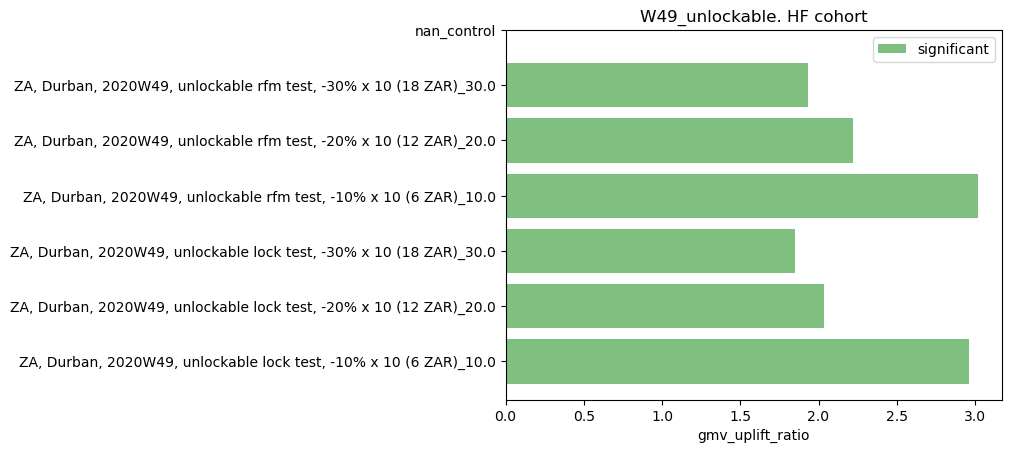

In [623]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'high_frequency']['treatment2']
significance = dfs[dfs['cohort'] == 'high_frequency']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'high_frequency']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('W49_unlockable. HF cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

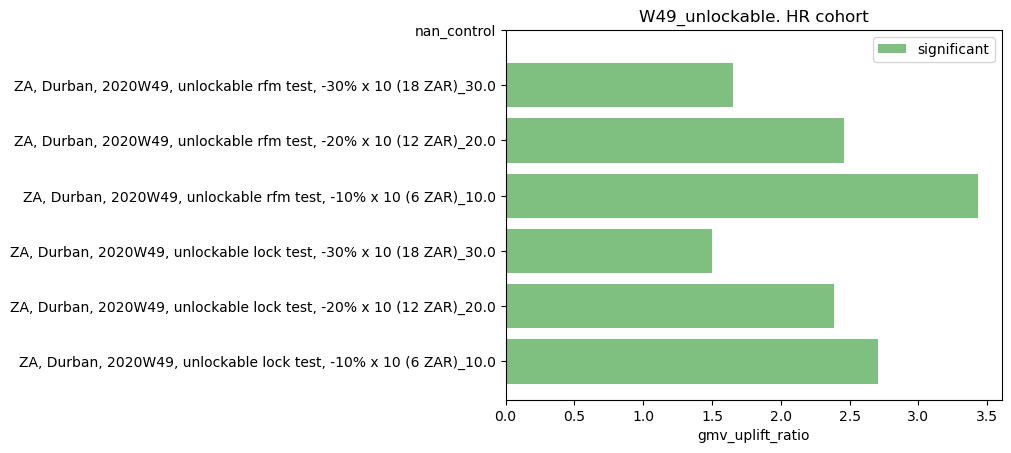

In [625]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'high_recency']['treatment2']
significance = dfs[dfs['cohort'] == 'high_recency']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'high_recency']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('W49_unlockable. HR cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()


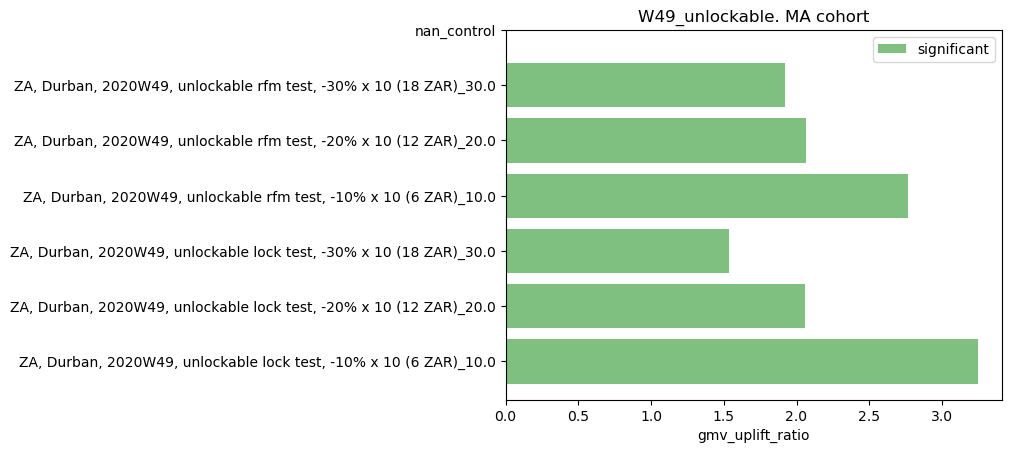

In [626]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'med_activity']['treatment2']
significance = dfs[dfs['cohort'] == 'med_activity']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'med_activity']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('W49_unlockable. MA cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

## W50 - Second week (THERE IS NO "NOT ENROLLED" HERE) - IT IS BELOW IN THE NEXT SECTION

In [467]:
#save dfs_control by cohort from 1 week
dfs_control_1w = dfs_control

In [468]:
#get ids from control group on the 1 week, to get their activity on 2 and 3 weeks
ids_control = list_to_string(dft[dft['treatment2'] == 'nan_control'].user_id.unique())

In [469]:
dft[dft['treatment2'] == 'nan_control'].user_id.nunique() #unique users control from 1 week

7953

In [762]:
#get activity of riders from 2week campaign
w = '2020-12-07'

overwrite_file = False

if country in ['za','ee','lv','lt']:
    #campaigns starting on Thu
    campaign_start = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=3)).strftime('%Y-%m-%d')
    campaign_end = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=3+6)).strftime( '%Y-%m-%d')
else:
    #campaigns starting on Tue
    campaign_start = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    campaign_end = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=1+6)).strftime( '%Y-%m-%d')  

filename_df_riders = 'test_activity_{}_{}_{}_{}.csv'.format(country, city,campaign_start,campaign_end)

if filename_df_riders not in os.listdir(data_path) or overwrite_file: 
    dfa = utils.read_from_redshift(sql_2w.format(
        campaign_start,
        campaign_end,
        city
    )) 
    dfa.to_csv('{}/{}'.format(data_path,filename_df_riders), compression='gzip', index=False)
else:
    print('reading from file')
    dfa = pd.read_csv('{}/{}'.format(data_path,filename_df_riders), compression = 'gzip')

    

reading from file


In [763]:
dfa.groupby(['campaign_name']).user_id.count()

campaign_name
ZA, Durban, 2020W50, unlockable lock test, -20% x 10 (12 ZAR)     780
ZA, Durban, 2020W50, unlockable lock test, -30% x 10 (18 ZAR)     850
ZA, Durban, 2020W50, unlockable lock test, -40% x 10 (24 ZAR)     934
ZA, Durban, 2020W50, unlockable rfm test, -10% x 10 (6 ZAR)      8058
ZA, Durban, 2020W50, unlockable rfm test, -20% x 10 (12 ZAR)     8018
ZA, Durban, 2020W50, unlockable rfm test, -30% x 10 (18 ZAR)     8022
Name: user_id, dtype: int64

In [550]:
#get activity of control group on 2 week
dfa_control = utils.read_from_redshift(sql_2w_control)

query started at: 18:50:05.212838
query ended at: 18:50:28.058573


In [761]:
dfa_control.count() #check with previous count upper

user_id                 7953
finished_order_count    7953
ride_price_sum          7953
price_sum               7953
discount_all_sum        7953
has_ride                7953
dtype: int64

In [764]:
#let's do some merge work

#merge cohorts to control dfa
dft_control = dfa_control.merge(dfc, how = 'left', on = 'user_id')

#create control_name for control
dft_control['treatment2'] = 'nan_control'

#merge cohorts to 2week dfa

dft = dfa.merge(dfc, how = 'left', on = 'user_id')


#create new treatment variable

dft["campaign_percentage"] = dft["campaign_percentage"].astype(str)
dft["treatment"] = np.where((dft["is_control"]==1),'control',dft["campaign_percentage"])

dft["treatment"] = np.where((dft["treatment"]=='nan'),'no_treatment',dft["treatment"])

#create treatment two for differentiating campaign_name + treatment
dft['treatment2'] = dft['campaign_name'].astype(str) + '_' + dft['treatment'].astype(str)

#merge control and 2week

dft = pd.concat([dft_control, dft])

In [789]:
# let's repeat what we've done in the previous cycle by a bit tweaking that loop, pay attention that we use now discount_all istead of discount

#aggregate, calc efficiency, add p-values

fields = ['cohort', 'treatment2']
control_name = 'nan_control' #name of the control group in groupby_1 array

#set names for aggregations and calcs
groupby_treatment = dft[fields[1]].unique()#this feature includes control group, "treatment"
groupby_2 = dft[fields[0]].unique() #additional groupby field, cohort, country etc
                
                
dfs = pd.DataFrame({
    "user_count":dft.groupby(fields)["user_id"].count(),
    "has_ride_sum":dft.groupby(fields)["has_ride"].sum(),
    "has_ride_avg":dft.groupby(fields)["has_ride"].mean(), 
    
    "discount_all_avg":dft.groupby(fields)["discount_all_sum"].mean(),
    #"discount_sum":dft.groupby(fields)["discount_sum"].sum(),
    "discount_avg":dft.groupby(fields)["discount_sum"].mean(),

    #"gmv_sum":dft.groupby(fields)["ride_price_sum"].sum(),
    "gmv_avg":dft.groupby(fields)["ride_price_sum"].mean(),
    
    #"nmv_sum":dft.groupby(fields)["price_sum"].sum(),
    "nmv_avg":dft.groupby(fields)["price_sum"].mean(), 
    
    #"finished_order_sum":dft.groupby(fields)["finished_order_count"].sum(),
    "finished_order_avg":dft.groupby(fields)["finished_order_count"].mean()

}).reset_index()

#add control metrics to df
dfs_control = dfs[dfs[fields[1]]==control_name][[fields[0],"gmv_avg","has_ride_avg","discount_all_avg"]]
dfs_control = dfs_control.rename(columns = {"gmv_avg":"control_gmv_avg",
                                            "has_ride_avg":"control_has_ride_avg",
                                            "discount_all_avg":"control_discount_all_avg"
                                           })
dfs = dfs.merge(dfs_control, how = 'left', on = [fields[0]])

#calculate efficiency
dfs["gmv_uplift"]= np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["gmv_avg"]-dfs["control_gmv_avg"])

dfs["gmv_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["gmv_uplift"]/dfs["discount_all_avg"])

dfs["activation_uplift"] = np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["has_ride_avg"]-dfs["control_has_ride_avg"])

dfs["activation_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["activation_uplift"]/dfs["discount_all_avg"])

#merge testgroup names
#dfs = pd.merge(dfs, testgroups, how = "left", left_on = "treatment", right_on= "treatment_name")

#p-value for AB
#fields in user level dataset
fields_p = ["discount_sum","ride_price_sum","price_sum","finished_order_count","has_ride"]


for group in groupby_2:
    for treatment in groupby_treatment: 
        for field in fields_p:
            p=ttest_2(dft[(dft[fields[1]]==control_name)&(dft[fields[0]] == group)][field],
                      dft[(dft[fields[1]]==treatment)&(dft[fields[0]] == group)][field])[1]
            p = round(p,4)
            #rename some fields
            if field == "ride_price_sum": field = "gmv_sum"
            if field == "price_sum": field = "nmv_sum"
            #print(country + ' ' + treatment + ' ' + field + ' {}'.format(p))
            dfs.loc[(dfs[fields[1]]==treatment)&(dfs[fields[0]]==group), str(field) + ' p-val'] = p
        


In [790]:
dfs

,cohort,treatment2,user_count,has_ride_sum,has_ride_avg,discount_all_avg,discount_avg,gmv_avg,nmv_avg,finished_order_avg,control_gmv_avg,control_has_ride_avg,control_discount_all_avg,gmv_uplift,gmv_uplift_ratio,activation_uplift,activation_uplift_ratio,discount_sum p-val,gmv_sum p-val,nmv_sum p-val,finished_order_count p-val,has_ride p-val
0,high_frequency,"ZA, Durban, 2020W50, unlockable lock test, -20...",327,207,0.633,0.855,0.855,5.527,4.672,1.985,1.264,0.219,0.001,4.263,4.989,0.414,0.484,nan,0.000,0.000,0.000,0.000
1,high_frequency,"ZA, Durban, 2020W50, unlockable lock test, -30...",390,238,0.610,1.141,1.141,4.917,3.776,1.764,1.264,0.219,0.001,3.653,3.202,0.391,0.343,nan,0.000,0.000,0.000,0.000
2,high_frequency,"ZA, Durban, 2020W50, unlockable lock test, -40...",425,284,0.668,2.030,2.030,6.593,4.563,2.275,1.264,0.219,0.001,5.330,2.626,0.449,0.221,nan,0.000,0.000,0.000,0.000
3,high_frequency,"ZA, Durban, 2020W50, unlockable rfm test, -10%...",3325,752,0.226,0.102,0.102,1.402,1.300,0.460,1.264,0.219,0.001,0.138,1.353,0.007,0.067,nan,0.158,0.697,0.134,0.506
4,high_frequency,"ZA, Durban, 2020W50, unlockable rfm test, -20%...",3207,808,0.252,0.242,0.240,1.585,1.343,0.542,1.264,0.219,0.001,0.322,1.327,0.033,0.135,nan,0.001,0.391,0.000,0.002
5,high_frequency,"ZA, Durban, 2020W50, unlockable rfm test, -30%...",3314,922,0.278,0.441,0.441,1.950,1.509,0.646,1.264,0.219,0.001,0.686,1.556,0.059,0.133,nan,0.000,0.009,0.000,0.000
6,high_frequency,nan_control,3201,702,0.219,0.001,nan,1.264,1.263,0.419,1.264,0.219,0.001,nan,nan,nan,nan,nan,1.000,1.000,1.000,1.000
7,high_recency,"ZA, Durban, 2020W50, unlockable lock test, -20...",316,159,0.503,0.567,0.567,3.700,3.133,1.266,1.102,0.192,0.000,2.598,4.580,0.311,0.548,nan,0.000,0.000,0.000,0.000
8,high_recency,"ZA, Durban, 2020W50, unlockable lock test, -30...",328,179,0.546,1.153,1.151,5.150,3.996,1.723,1.102,0.192,0.000,4.048,3.509,0.354,0.306,nan,0.000,0.000,0.000,0.000
9,high_recency,"ZA, Durban, 2020W50, unlockable lock test, -40...",338,181,0.536,1.315,1.311,4.092,2.777,1.473,1.102,0.192,0.000,2.989,2.273,0.343,0.261,nan,0.000,0.000,0.000,0.000


In [791]:
dfs.to_csv('unlock_w50_pval_results.csv')

In [792]:
dfs['significance'] = np.where(dfs['gmv_sum p-val'] <= 0.05, 'green', 'red')

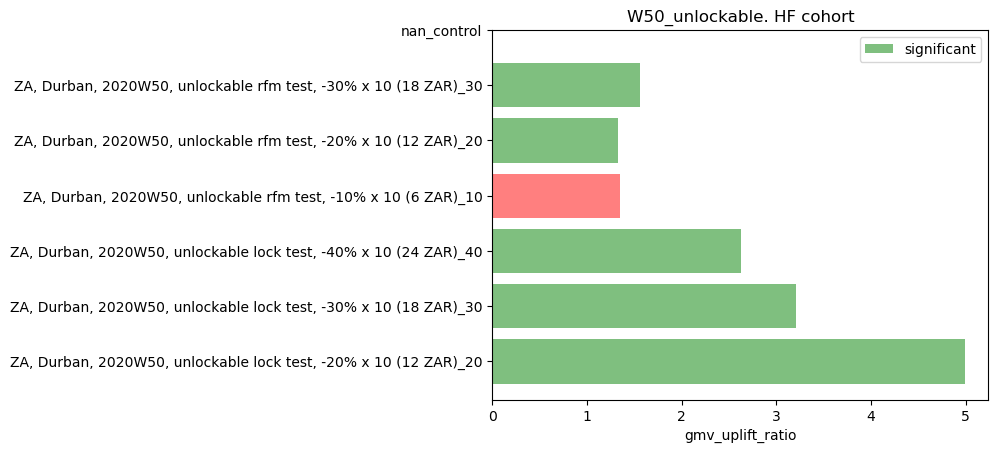

In [793]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'high_frequency']['treatment2']
significance = dfs[dfs['cohort'] == 'high_frequency']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'high_frequency']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('W50_unlockable. HF cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

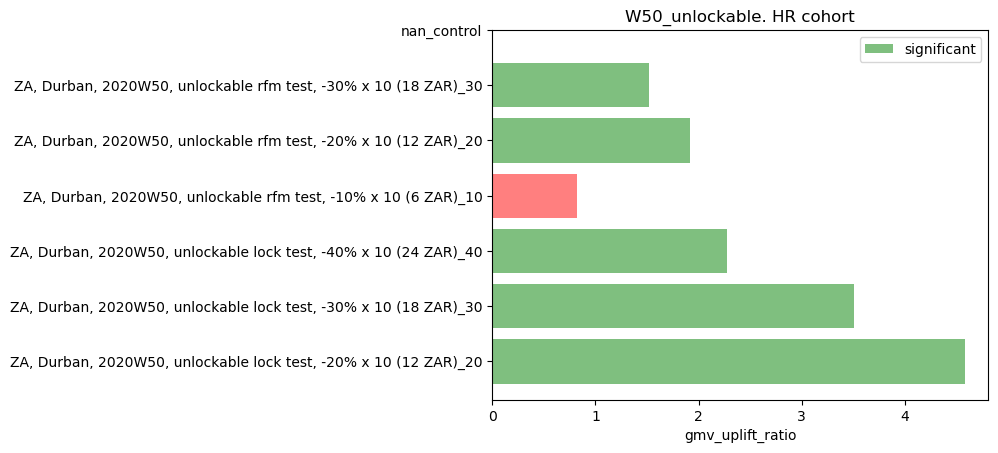

In [794]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'high_recency']['treatment2']
significance = dfs[dfs['cohort'] == 'high_recency']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'high_recency']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('W50_unlockable. HR cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

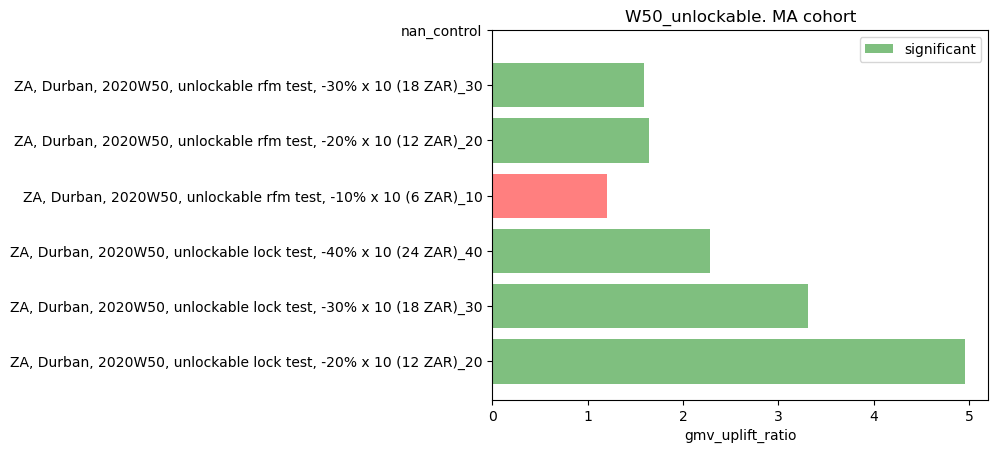

In [795]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'med_activity']['treatment2']
significance = dfs[dfs['cohort'] == 'med_activity']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'med_activity']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('W50_unlockable. MA cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

## Getting comparison including those who were not enrolled into 2w campaigns

## we need to get info about other users who didn't use that option. 1 - let's get two datasets 1w and 2w. 2 - remove control for sanity 3 - check ids that are not present in 2w, but present 1w. These are our guys. 

In [641]:
ids_control = dft[dft['treatment2'] == 'nan_control']

In [642]:
dft_w1_no_cntrl = dft_w1[~(dft_w1['treatment2']=='nan_control')]
print(dft_w1_no_cntrl.user_id.count())
dft_w1_no_cntrl = dft_w1_no_cntrl[dft_w1_no_cntrl['targeted_campaign_id'].isin([20075, 20076,20077])]
print(dft_w1_no_cntrl.user_id.count())

48023
23925


In [643]:
print(dft_w1.user_id.count(),dft_w1_no_cntrl.user_id.count(), dft_2w.user_id.count())

55976 23925 26662


In [644]:
#not enrolled into lock campaign on 2w
not_enrolled = dft_w1_no_cntrl[~dft_w1_no_cntrl['user_id'].isin(dft_2w['user_id'])]

In [649]:
#list of ids
not_enrolled_ids = list_to_string(not_enrolled.user_id)

In [ ]:
#find activity of not enrolled ids 

In [706]:
dfa_2w_not_enrolled = utils.read_from_redshift(sql_not_enrolled.format(not_enrolled_ids))

query started at: 07:46:25.729961
query ended at: 07:46:36.543742


In [707]:
dfa_2w_not_enrolled.count() # - that's how many riders from not enrolled had any activity on the 2week

user_id                 3857
finished_order_count    3857
ride_price_sum          3857
price_sum               3857
discount_all_sum        3857
has_ride                3857
dtype: int64

In [709]:
#merge these guys with those who had 0 rides 
dfa_2w_not_enrolled.head()

,user_id,finished_order_count,ride_price_sum,price_sum,discount_all_sum,has_ride
0,657094,1,2.702,2.702,0.000,1
1,658312,1,6.223,6.223,0.000,1
2,833656,2,3.288,3.288,0.000,1
3,855402,1,11.564,11.564,0.000,1
4,917480,7,38.465,38.465,0.000,1


In [710]:
not_enrolled.head()

,user_id,test_id,test_name,campaign_name,treatment_type,is_control,targeted_campaign_id,campaign_percentage,campaign_max_value,is_in_holdout,finished_order_count,ride_price_sum,price_sum,discount_sum,discount_all_sum,has_ride,hp_finished_order_count,hp_ride_price_sum,hp_price_sum,hp_discount_sum,hp_discount_all_sum,hp_has_ride,method,period,city,country,cohort,treatment,treatment2
0,221787,13972,"ZA, Durban, 2020W49, unlockable lock test, HR","ZA, Durban, 2020W49, unlockable lock test, -20...",treatment,0,20076.000,20.0,12.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_recency,20.0,"ZA, Durban, 2020W49, unlockable lock test, -20..."
2,606016,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -10...",treatment,0,20075.000,10.0,6.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,10.0,"ZA, Durban, 2020W49, unlockable lock test, -10..."
4,640794,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -30...",treatment,0,20077.000,30.0,18.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,30.0,"ZA, Durban, 2020W49, unlockable lock test, -30..."
5,657094,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -10...",treatment,0,20075.000,10.0,6.000,1,1,1.140,1.031,0.109,0.109,1,1,2.702,2.702,0.000,0.000,1,rfmv2,2020-12-02,Durban,za,high_frequency,10.0,"ZA, Durban, 2020W49, unlockable lock test, -10..."
6,658312,13971,"ZA, Durban, 2020W49, unlockable lock test, MA","ZA, Durban, 2020W49, unlockable lock test, -10...",treatment,0,20075.000,10.0,6.000,1,0,0.000,0.000,0.000,0.000,0,1,6.223,6.223,0.000,0.000,1,rfmv2,2020-12-02,Durban,za,med_activity,10.0,"ZA, Durban, 2020W49, unlockable lock test, -10..."


In [756]:
#creating new merged dataset with present and not to include them later into the main w50 dataset
#first just dataset with ids that didn't have any activity 
temp_list = dfa_2w_not_enrolled['user_id'].to_list()
not_enrolled_na = not_enrolled[~not_enrolled['user_id'].isin(temp_list)][['user_id', 'finished_order_count', 'ride_price_sum', 'price_sum', 'discount_all_sum', 'has_ride']]
#now merge to activity
dfa_2w_not_enrolled_full = pd.concat([dfa_2w_not_enrolled, not_enrolled_na])
dfa_2w_not_enrolled_full = dfa_2w_not_enrolled_full.merge(not_enrolled[['user_id', 'is_control', 'cohort', 'treatment']], how = 'left', on = 'user_id')

In [759]:
dfa_2w_not_enrolled_full.head()

,user_id,finished_order_count,ride_price_sum,price_sum,discount_all_sum,has_ride,is_control,cohort,treatment,treatment2
0,657094,1,2.702,2.702,0.000,1,0,high_frequency,20,"ZA, Durban, 2020W50, unlockable lock test, -20..."
1,658312,1,6.223,6.223,0.000,1,0,med_activity,20,"ZA, Durban, 2020W50, unlockable lock test, -20..."
2,833656,2,3.288,3.288,0.000,1,0,high_frequency,30,"ZA, Durban, 2020W50, unlockable lock test, -30..."
3,855402,1,11.564,11.564,0.000,1,0,high_frequency,30,"ZA, Durban, 2020W50, unlockable lock test, -30..."
4,917480,7,38.465,38.465,0.000,1,0,high_frequency,40,"ZA, Durban, 2020W50, unlockable lock test, -40..."


In [758]:
#let's set some variable to merge with the main w50 dataset
dfa_2w_not_enrolled_full['treatment'] = dfa_2w_not_enrolled_full['treatment'].astype(float) + 10 #change to the right second week treatment
dfa_2w_not_enrolled_full['treatment'] = dfa_2w_not_enrolled_full['treatment'].astype(int).astype(object) #make it str again 

#set names as they were in 2 week for treatment and campaigns 
conditions = [dfa_2w_not_enrolled_full['treatment'] == 20, dfa_2w_not_enrolled_full['treatment'] == 30, dfa_2w_not_enrolled_full['treatment'] == 40]
values = ['ZA, Durban, 2020W50, unlockable lock test, -20% x 10 (12 ZAR)_20',  'ZA, Durban, 2020W50, unlockable lock test, -30% x 10 (18 ZAR)_30', 'ZA, Durban, 2020W50, unlockable lock test, -40% x 10 (24 ZAR)_40']
dfa_2w_not_enrolled_full['treatment2'] = np.select(conditions, values)

In [774]:
#merging with main one that contains also control group. Make sure you loaded a necessary dft! So messy here, my God. 
dft_2w_full = pd.concat([dft, dfa_2w_not_enrolled_full])
dft_2w_full.to_csv('dft_2w_full.csv')

In [796]:
# let's repeat what we've done in the previous cycle

#aggregate, calc efficiency, add p-values

fields = ['cohort', 'treatment2']
control_name = 'nan_control' #name of the control group in groupby_1 array

#set names for aggregations and calcs
groupby_treatment = dft_2w_full[fields[1]].unique()#this feature includes control group, "treatment"
groupby_2 = dft_2w_full[fields[0]].unique() #additional groupby field, cohort, country etc
                
                
dfs = pd.DataFrame({
    "user_count":dft_2w_full.groupby(fields)["user_id"].count(),
    "has_ride_sum":dft_2w_full.groupby(fields)["has_ride"].sum(),
    "has_ride_avg":dft_2w_full.groupby(fields)["has_ride"].mean(), 
    
    "discount_all_avg":dft_2w_full.groupby(fields)["discount_all_sum"].mean(),
    #"discount_sum":dft.groupby(fields)["discount_sum"].sum(),
    "discount_avg":dft_2w_full.groupby(fields)["discount_sum"].mean(),

    #"gmv_sum":dft.groupby(fields)["ride_price_sum"].sum(),
    "gmv_avg":dft_2w_full.groupby(fields)["ride_price_sum"].mean(),
    
    #"nmv_sum":dft.groupby(fields)["price_sum"].sum(),
    "nmv_avg":dft_2w_full.groupby(fields)["price_sum"].mean(), 
    
    #"finished_order_sum":dft.groupby(fields)["finished_order_count"].sum(),
    "finished_order_avg":dft_2w_full.groupby(fields)["finished_order_count"].mean()

}).reset_index()

#add control metrics to df
dfs_control = dfs[dfs[fields[1]]==control_name][[fields[0],"gmv_avg","has_ride_avg","discount_all_avg"]]
dfs_control = dfs_control.rename(columns = {"gmv_avg":"control_gmv_avg",
                                            "has_ride_avg":"control_has_ride_avg",
                                            "discount_all_avg":"control_discount_all_avg"
                                           })
dfs = dfs.merge(dfs_control, how = 'left', on = [fields[0]])

#calculate efficiency
dfs["gmv_uplift"]= np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["gmv_avg"]-dfs["control_gmv_avg"])

dfs["gmv_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["gmv_uplift"]/dfs["discount_all_avg"])

dfs["activation_uplift"] = np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["has_ride_avg"]-dfs["control_has_ride_avg"])

dfs["activation_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["activation_uplift"]/dfs["discount_all_avg"])

#merge testgroup names
#dfs = pd.merge(dfs, testgroups, how = "left", left_on = "treatment", right_on= "treatment_name")

#p-value for AB
#fields in user level dataset
fields_p = ["discount_all_sum","ride_price_sum","price_sum","finished_order_count","has_ride"]


for group in groupby_2:
    for treatment in groupby_treatment: 
        for field in fields_p:
            p=ttest_2(dft_2w_full[(dft_2w_full[fields[1]]==control_name)&(dft_2w_full[fields[0]] == group)][field],
                      dft_2w_full[(dft_2w_full[fields[1]]==treatment)&(dft_2w_full[fields[0]] == group)][field])[1]
            p = round(p,4)
            #rename some fields
            if field == "ride_price_sum": field = "gmv_sum"
            if field == "price_sum": field = "nmv_sum"
            #print(country + ' ' + treatment + ' ' + field + ' {}'.format(p))
            dfs.loc[(dfs[fields[1]]==treatment)&(dfs[fields[0]]==group), str(field) + ' p-val'] = p
        


In [797]:
dfs

,cohort,treatment2,user_count,has_ride_sum,has_ride_avg,discount_all_avg,discount_avg,gmv_avg,nmv_avg,finished_order_avg,control_gmv_avg,control_has_ride_avg,control_discount_all_avg,gmv_uplift,gmv_uplift_ratio,activation_uplift,activation_uplift_ratio,discount_all_sum p-val,gmv_sum p-val,nmv_sum p-val,finished_order_count p-val,has_ride p-val
0,high_frequency,"ZA, Durban, 2020W50, unlockable lock test, -20...",3174,991,0.312,0.106,0.855,1.791,1.685,0.592,1.264,0.219,0.001,0.527,4.994,0.093,0.880,0.000,0.000,0.000,0.000,0.000
1,high_frequency,"ZA, Durban, 2020W50, unlockable lock test, -30...",3292,969,0.294,0.169,1.141,1.592,1.423,0.535,1.264,0.219,0.001,0.328,1.943,0.075,0.444,0.000,0.001,0.077,0.000,0.000
2,high_frequency,"ZA, Durban, 2020W50, unlockable lock test, -40...",3305,1072,0.324,0.319,2.030,2.046,1.727,0.657,1.264,0.219,0.001,0.782,2.453,0.105,0.330,0.000,0.000,0.000,0.000,0.000
3,high_frequency,"ZA, Durban, 2020W50, unlockable rfm test, -10%...",3325,752,0.226,0.102,0.102,1.402,1.300,0.460,1.264,0.219,0.001,0.138,1.353,0.007,0.067,0.000,0.158,0.697,0.134,0.506
4,high_frequency,"ZA, Durban, 2020W50, unlockable rfm test, -20%...",3207,808,0.252,0.242,0.240,1.585,1.343,0.542,1.264,0.219,0.001,0.322,1.327,0.033,0.135,0.000,0.001,0.391,0.000,0.002
5,high_frequency,"ZA, Durban, 2020W50, unlockable rfm test, -30%...",3314,922,0.278,0.441,0.441,1.950,1.509,0.646,1.264,0.219,0.001,0.686,1.556,0.059,0.133,0.000,0.000,0.009,0.000,0.000
6,high_frequency,nan_control,3201,702,0.219,0.001,nan,1.264,1.263,0.419,1.264,0.219,0.001,nan,nan,nan,nan,1.000,1.000,1.000,1.000,1.000
7,high_recency,"ZA, Durban, 2020W50, unlockable lock test, -20...",3163,921,0.291,0.080,0.567,1.363,1.283,0.444,1.102,0.192,0.000,0.261,3.266,0.099,1.239,0.000,0.003,0.034,0.001,0.000
8,high_recency,"ZA, Durban, 2020W50, unlockable lock test, -30...",3034,923,0.304,0.169,1.151,1.703,1.534,0.532,1.102,0.192,0.000,0.600,3.551,0.112,0.662,0.000,0.000,0.000,0.000,0.000
9,high_recency,"ZA, Durban, 2020W50, unlockable lock test, -40...",3150,935,0.297,0.210,1.311,1.507,1.296,0.484,1.102,0.192,0.000,0.404,1.923,0.105,0.498,0.000,0.000,0.029,0.000,0.000


In [785]:
dfs.to_csv('w50_full_not_enrolled_pvals.csv')

In [798]:
dfs['significance'] = np.where(dfs['gmv_sum p-val'] <= 0.05, 'green', 'red')

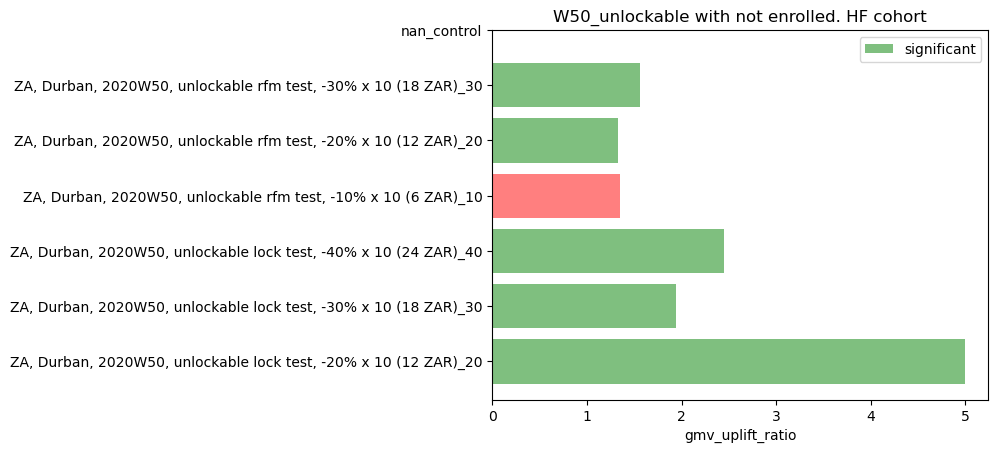

In [799]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'high_frequency']['treatment2']
significance = dfs[dfs['cohort'] == 'high_frequency']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'high_frequency']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('W50_unlockable with not enrolled. HF cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

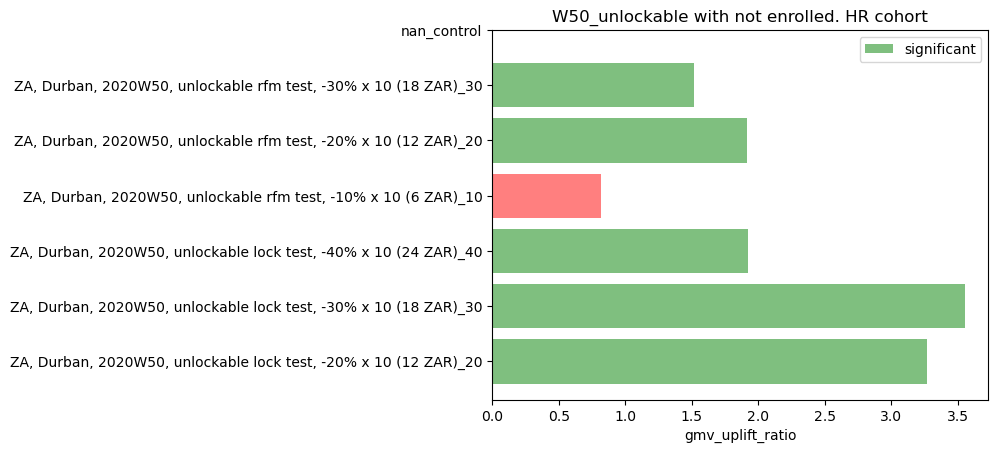

In [800]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'high_recency']['treatment2']
significance = dfs[dfs['cohort'] == 'high_recency']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'high_recency']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('W50_unlockable with not enrolled. HR cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

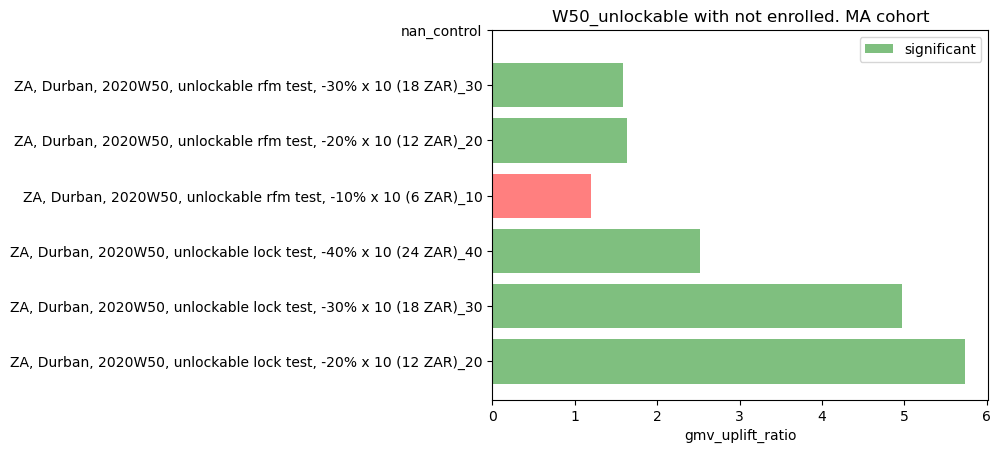

In [801]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'med_activity']['treatment2']
significance = dfs[dfs['cohort'] == 'med_activity']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'med_activity']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('W50_unlockable with not enrolled. MA cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

## HOLDOUT PERIOD ANALYSIS, PROBABLY WRONG ONE - 1 week campaign, 2 weeks of HP. FOR Different one go below, after COMMS. 

In [803]:
w = '2020-11-30'
overwrite_file = False

if country in ['za','ee','lv','lt']:
    #campaigns starting on Thu
    campaign_start = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=3)).strftime('%Y-%m-%d')
    campaign_end = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=3+6)).strftime( '%Y-%m-%d')
else:
    #campaigns starting on Tue
    campaign_start = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    campaign_end = (datetime.datetime.strptime(w, '%Y-%m-%d') + datetime.timedelta(days=1+6)).strftime( '%Y-%m-%d')  

filename_df_riders = 'test_activity_{}_{}_{}_{}.csv'.format(country, city,campaign_start,campaign_end)

if filename_df_riders not in os.listdir(data_path) or overwrite_file: 
    dfa = utils.read_from_redshift(sql.format(
        campaign_start,
        campaign_end,
        city
    )) 
    dfa.to_csv('{}/{}'.format(data_path,filename_df_riders), compression='gzip', index=False)
else:
    print('reading from file')
    dfa = pd.read_csv('{}/{}'.format(data_path,filename_df_riders), compression = 'gzip')

reading from file


In [804]:
dft_hp = dfa.merge(dfc, how = 'left', on = 'user_id')

dft_hp["campaign_percentage"] = dft_hp["campaign_percentage"].astype(str)
dft_hp["treatment"] = np.where((dft_hp["is_control"]==1),'control',dft_hp["campaign_percentage"])

dft_hp["treatment"] = np.where((dft_hp["treatment"]=='nan'),'no_treatment',dft_hp["treatment"])

In [805]:
#add campaign name to treatment! 
dft_hp['treatment2'] = dft_hp['campaign_name'].astype(str) + '_' + dft_hp['treatment'].astype(str)
dft_hp['treatment2'].unique()

array(['ZA, Durban, 2020W49, unlockable lock test, -20% x 10 (12 ZAR)_20.0',
       'ZA, Durban, 2020W49, unlockable rfm test, -20% x 10 (12 ZAR)_20.0',
       'ZA, Durban, 2020W49, unlockable lock test, -10% x 10 (6 ZAR)_10.0',
       'nan_control',
       'ZA, Durban, 2020W49, unlockable lock test, -30% x 10 (18 ZAR)_30.0',
       'ZA, Durban, 2020W49, unlockable rfm test, -30% x 10 (18 ZAR)_30.0',
       'ZA, Durban, 2020W49, unlockable rfm test, -10% x 10 (6 ZAR)_10.0'],
      dtype=object)

In [821]:
#aggregate, calc efficiency, add p-values

fields = ['cohort', 'treatment2']
control_name = 'nan_control' #name of the control group in groupby_1 array

#set names for aggregations and calcs
groupby_treatment = dft_hp[fields[1]].unique()#this feature includes control group, "treatment"
groupby_2 = dft_hp[fields[0]].unique() #additional groupby field, cohort, country etc
                
                
dfs = pd.DataFrame({
    "user_count":dft_hp.groupby(fields)["user_id"].count(),
    "has_ride_sum":dft_hp.groupby(fields)["hp_has_ride"].sum(),
    "has_ride_avg":dft_hp.groupby(fields)["hp_has_ride"].mean(), 
    
    "discount_all_avg":dft_hp.groupby(fields)["discount_all_sum"].mean(),
    #"discount_sum":dft.groupby(fields)["discount_sum"].sum(),
    "discount_avg":dft_hp.groupby(fields)["discount_sum"].mean(),

    #"gmv_sum":dft.groupby(fields)["ride_price_sum"].sum(),
    "gmv_avg":dft_hp.groupby(fields)["hp_ride_price_sum"].mean(),
    
    #"nmv_sum":dft.groupby(fields)["price_sum"].sum(),
    "nmv_avg":dft_hp.groupby(fields)["hp_price_sum"].mean(), 
    
    #"finished_order_sum":dft.groupby(fields)["finished_order_count"].sum(),
    "finished_order_avg":dft_hp.groupby(fields)["hp_finished_order_count"].mean()

}).reset_index()

#add control metrics to df
dfs_control = dfs[dfs[fields[1]]==control_name][[fields[0],"gmv_avg","has_ride_avg","discount_avg"]]
dfs_control = dfs_control.rename(columns = {"gmv_avg":"control_gmv_avg",
                                            "has_ride_avg":"control_has_ride_avg",
                                            "discount_avg":"control_discount_avg"
                                           })
dfs = dfs.merge(dfs_control, how = 'left', on = [fields[0]])

#calculate efficiency
dfs["gmv_uplift"]= np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["gmv_avg"]-dfs["control_gmv_avg"])

dfs["gmv_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["gmv_uplift"]/dfs["discount_avg"])

dfs["activation_uplift"] = np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["has_ride_avg"]-dfs["control_has_ride_avg"])

dfs["activation_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["activation_uplift"]/dfs["discount_avg"])

#merge testgroup names
#dfs = pd.merge(dfs, testgroups, how = "left", left_on = "treatment", right_on= "treatment_name")

#p-value for AB
#fields in user level dataset
fields_p = ["discount_sum","ride_price_sum","price_sum","finished_order_count","has_ride"]


for group in groupby_2:
    for treatment in groupby_treatment: 
        for field in fields_p:
            p=ttest_2(dft_hp[(dft_hp[fields[1]]==control_name)&(dft_hp[fields[0]] == group)][field],
                      dft_hp[(dft_hp[fields[1]]==treatment)&(dft_hp[fields[0]] == group)][field])[1]
            p = round(p,4)
            #rename some fields
            if field == "ride_price_sum": field = "gmv_sum"
            if field == "price_sum": field = "nmv_sum"
            #print(country + ' ' + treatment + ' ' + field + ' {}'.format(p))
            dfs.loc[(dfs[fields[1]]==treatment)&(dfs[fields[0]]==group), str(field) + ' p-val'] = p
        


In [822]:
dfs['gmv_diff'] = (dfs['gmv_avg'] - dfs['control_gmv_avg'])/dfs['control_gmv_avg'] *100
dfs

,cohort,treatment2,user_count,has_ride_sum,has_ride_avg,discount_all_avg,discount_avg,gmv_avg,nmv_avg,finished_order_avg,control_gmv_avg,control_has_ride_avg,control_discount_avg,gmv_uplift,gmv_uplift_ratio,activation_uplift,activation_uplift_ratio,discount_sum p-val,gmv_sum p-val,nmv_sum p-val,finished_order_count p-val,has_ride p-val,gmv_diff
0,high_frequency,"ZA, Durban, 2020W49, unlockable lock test, -10...",3174,1070,0.337,0.093,0.092,3.001,2.910,0.953,2.505,0.328,0.000,0.496,5.372,0.009,0.098,0.000,0.001,0.017,0.000,0.001,19.794
1,high_frequency,"ZA, Durban, 2020W49, unlockable lock test, -20...",3292,1098,0.334,0.210,0.209,2.671,2.536,0.858,2.505,0.328,0.000,0.166,0.795,0.006,0.026,0.000,0.000,0.004,0.000,0.000,6.627
2,high_frequency,"ZA, Durban, 2020W49, unlockable lock test, -30...",3305,1142,0.346,0.358,0.356,3.180,2.914,0.989,2.505,0.328,0.000,0.675,1.894,0.018,0.049,0.000,0.000,0.000,0.000,0.000,26.945
3,high_frequency,"ZA, Durban, 2020W49, unlockable rfm test, -10%...",3325,1107,0.333,0.091,0.088,2.891,2.786,0.869,2.505,0.328,0.000,0.385,4.374,0.005,0.056,0.000,0.001,0.026,0.002,0.026,15.380
4,high_frequency,"ZA, Durban, 2020W49, unlockable rfm test, -20%...",3207,1124,0.350,0.211,0.205,2.879,2.637,0.922,2.505,0.328,0.000,0.374,1.827,0.022,0.110,0.000,0.000,0.003,0.000,0.000,14.930
5,high_frequency,"ZA, Durban, 2020W49, unlockable rfm test, -30%...",3314,1223,0.369,0.368,0.368,3.330,2.888,1.050,2.505,0.328,0.000,0.824,2.240,0.041,0.111,0.000,0.000,0.000,0.000,0.000,32.901
6,high_frequency,nan_control,3201,1050,0.328,0.000,0.000,2.505,2.504,0.786,2.505,0.328,0.000,nan,nan,nan,nan,nan,1.000,1.000,1.000,1.000,0.000
7,high_recency,"ZA, Durban, 2020W49, unlockable lock test, -10...",3163,944,0.298,0.091,0.089,2.146,2.088,0.652,2.251,0.298,0.000,-0.104,-1.178,0.001,0.008,0.000,0.003,0.044,0.000,0.000,-4.638
8,high_recency,"ZA, Durban, 2020W49, unlockable lock test, -20...",3034,967,0.319,0.210,0.210,2.675,2.551,0.788,2.251,0.298,0.000,0.425,2.022,0.021,0.100,0.000,0.000,0.000,0.000,0.000,18.871
9,high_recency,"ZA, Durban, 2020W49, unlockable lock test, -30...",3150,953,0.303,0.312,0.312,2.228,2.084,0.676,2.251,0.298,0.000,-0.022,-0.072,0.005,0.015,0.000,0.000,0.033,0.000,0.000,-0.998


In [823]:
dfs.to_csv('hp_unlockable_pvals.csv')

In [824]:
dfs['significance'] = np.where(dfs['gmv_sum p-val'] <= 0.05, 'green', 'red')

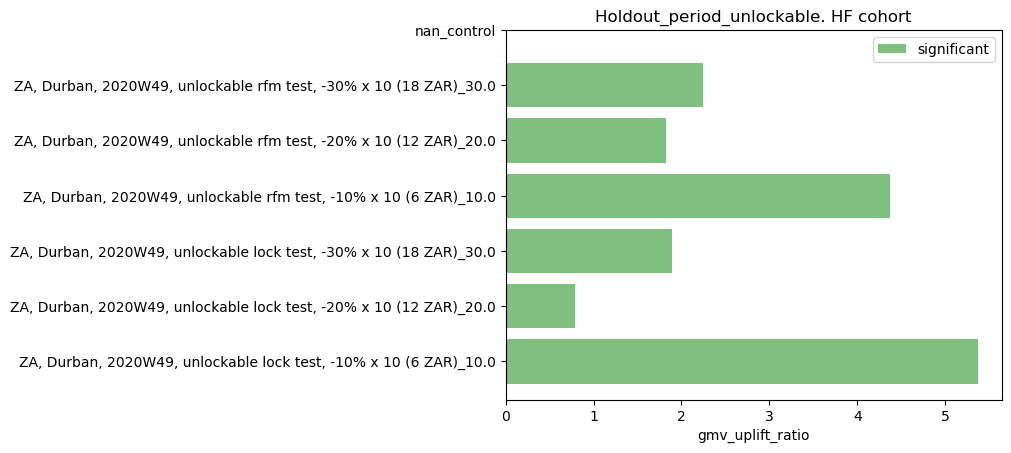

In [825]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'high_frequency']['treatment2']
significance = dfs[dfs['cohort'] == 'high_frequency']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'high_frequency']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('Holdout_period_unlockable. HF cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

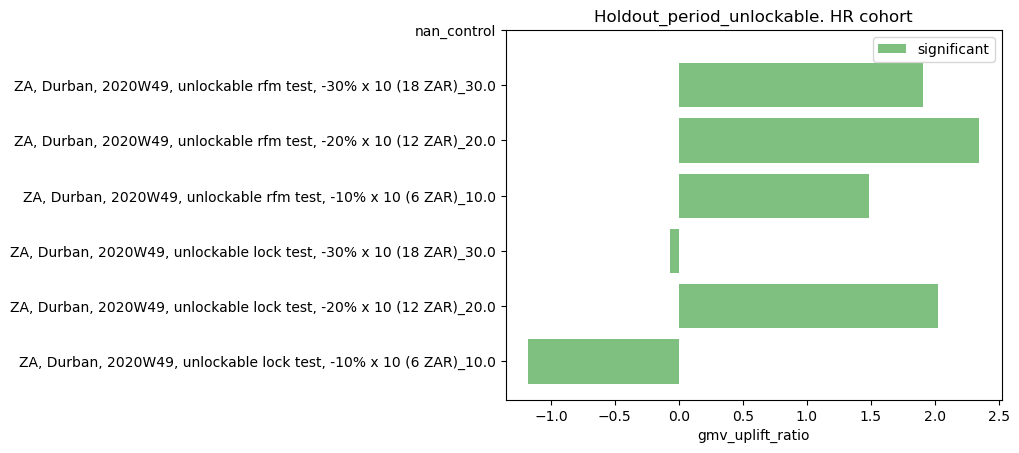

In [826]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'high_recency']['treatment2']
significance = dfs[dfs['cohort'] == 'high_recency']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'high_recency']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('Holdout_period_unlockable. HR cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

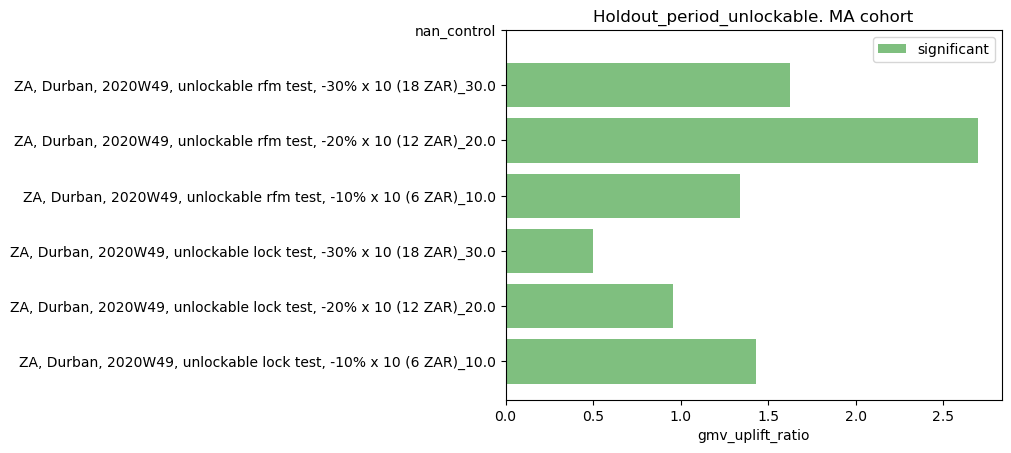

In [827]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'med_activity']['treatment2']
significance = dfs[dfs['cohort'] == 'med_activity']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'med_activity']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('Holdout_period_unlockable. MA cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

## Let's look at comms

In [833]:
comms = pd.read_csv('/Users/gadir/open_unlockable.csv')

In [835]:
opened_ids = comms.user_id.to_list()

In [837]:
dft_hp['has_opened'] = np.where(dft_hp.user_id.isin(opened_ids), 1, 0)

In [841]:
dft_hp.groupby('has_opened').user_id.count()

has_opened
0    54052
1     1924
Name: user_id, dtype: int64

In [855]:
dft_hp.groupby(['treatment2', 'has_opened']).user_id.count()

treatment2                                                          has_opened
ZA, Durban, 2020W49, unlockable lock test, -10% x 10 (6 ZAR)_10.0   0             7132
                                                                    1              785
ZA, Durban, 2020W49, unlockable lock test, -20% x 10 (12 ZAR)_20.0  0             7955
ZA, Durban, 2020W49, unlockable lock test, -30% x 10 (18 ZAR)_30.0  0             8053
ZA, Durban, 2020W49, unlockable rfm test, -10% x 10 (6 ZAR)_10.0    0             6922
                                                                    1             1136
ZA, Durban, 2020W49, unlockable rfm test, -20% x 10 (12 ZAR)_20.0   0             8017
                                                                    1                1
ZA, Durban, 2020W49, unlockable rfm test, -30% x 10 (18 ZAR)_30.0   0             8020
                                                                    1                2
nan_control                                        

In [856]:
#aggregate, calc efficiency, add p-values

fields = ['has_opened', 'treatment2']
control_name = 'nan_control' #name of the control group in groupby_1 array

#set names for aggregations and calcs
groupby_treatment = dft_hp[fields[1]].unique()#this feature includes control group, "treatment"
groupby_2 = dft_hp[fields[0]].unique() #additional groupby field, cohort, country etc
                
                
dfs = pd.DataFrame({
    "user_count":dft_hp.groupby(fields)["user_id"].count(),
    "has_ride_sum":dft_hp.groupby(fields)["hp_has_ride"].sum(),
    "has_ride_avg":dft_hp.groupby(fields)["hp_has_ride"].mean(), 
    
    "discount_all_avg":dft_hp.groupby(fields)["discount_all_sum"].mean(),
    #"discount_sum":dft.groupby(fields)["discount_sum"].sum(),
    "discount_avg":dft_hp.groupby(fields)["discount_sum"].mean(),

    #"gmv_sum":dft.groupby(fields)["ride_price_sum"].sum(),
    "gmv_avg":dft_hp.groupby(fields)["hp_ride_price_sum"].mean(),
    
    #"nmv_sum":dft.groupby(fields)["price_sum"].sum(),
    "nmv_avg":dft_hp.groupby(fields)["hp_price_sum"].mean(), 
    
    #"finished_order_sum":dft.groupby(fields)["finished_order_count"].sum(),
    "finished_order_avg":dft_hp.groupby(fields)["hp_finished_order_count"].mean()

}).reset_index()

#add control metrics to df
dfs_control = dfs[dfs[fields[1]]==control_name][[fields[0],"gmv_avg","has_ride_avg","discount_avg"]]
dfs_control = dfs_control.rename(columns = {"gmv_avg":"control_gmv_avg",
                                            "has_ride_avg":"control_has_ride_avg",
                                            "discount_avg":"control_discount_avg"
                                           })
#dfs = dfs.merge(dfs_control, how = 'left', on = [fields[0]])
dfs["control_gmv_avg"] = 2.336	
dfs["control_has_ride_avg"] = 0.316	
dfs["control_discount_avg"] = 0

#calculate efficiency
dfs["gmv_uplift"]= np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["gmv_avg"]-dfs["control_gmv_avg"])

dfs["gmv_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["gmv_uplift"]/dfs["discount_avg"])

dfs["activation_uplift"] = np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["has_ride_avg"]-dfs["control_has_ride_avg"])

dfs["activation_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["activation_uplift"]/dfs["discount_avg"])

#merge testgroup names
#dfs = pd.merge(dfs, testgroups, how = "left", left_on = "treatment", right_on= "treatment_name")

#p-value for AB
#fields in user level dataset
fields_p = ["discount_sum","ride_price_sum","price_sum","finished_order_count","has_ride"]


for group in groupby_2:
    for treatment in groupby_treatment: 
        for field in fields_p:
            p=ttest_2(dft_hp[(dft_hp[fields[1]]==control_name)][field],
                      dft_hp[(dft_hp[fields[1]]==treatment)&(dft_hp[fields[0]] == group)][field])[1]
            p = round(p,4)
            #rename some fields
            if field == "ride_price_sum": field = "gmv_sum"
            if field == "price_sum": field = "nmv_sum"
            #print(country + ' ' + treatment + ' ' + field + ' {}'.format(p))
            dfs.loc[(dfs[fields[1]]==treatment)&(dfs[fields[0]]==group), str(field) + ' p-val'] = p
        

In [857]:
dfs

,has_opened,treatment2,user_count,has_ride_sum,has_ride_avg,discount_all_avg,discount_avg,gmv_avg,nmv_avg,finished_order_avg,control_gmv_avg,control_has_ride_avg,control_discount_avg,gmv_uplift,gmv_uplift_ratio,activation_uplift,activation_uplift_ratio,discount_sum p-val,gmv_sum p-val,nmv_sum p-val,finished_order_count p-val,has_ride p-val
0,0,"ZA, Durban, 2020W49, unlockable lock test, -10...",7132,2240,0.314,0.086,0.086,2.475,2.408,0.769,2.336,0.316,0,0.139,1.623,-0.002,-0.022,0.000,0.000,0.004,0.000,0.000
1,0,"ZA, Durban, 2020W49, unlockable lock test, -20...",7955,2629,0.330,0.201,0.200,2.602,2.483,0.800,2.336,0.316,0,0.266,1.325,0.014,0.072,0.000,0.000,0.000,0.000,0.000
2,0,"ZA, Durban, 2020W49, unlockable lock test, -30...",8053,2642,0.328,0.328,0.327,2.636,2.443,0.815,2.336,0.316,0,0.300,0.917,0.012,0.037,0.000,0.000,0.000,0.000,0.000
3,0,"ZA, Durban, 2020W49, unlockable rfm test, -10%...",6922,2241,0.324,0.087,0.085,2.586,2.494,0.768,2.336,0.316,0,0.250,2.933,0.008,0.091,0.000,0.000,0.000,0.000,0.000
4,0,"ZA, Durban, 2020W49, unlockable rfm test, -20%...",8017,2828,0.353,0.202,0.199,2.771,2.545,0.854,2.336,0.316,0,0.435,2.189,0.037,0.185,0.000,0.000,0.000,0.000,0.000
5,0,"ZA, Durban, 2020W49, unlockable rfm test, -30%...",8020,2955,0.368,0.347,0.345,3.031,2.628,0.944,2.336,0.316,0,0.695,2.014,0.052,0.152,0.000,0.000,0.000,0.000,0.000
6,0,nan_control,7953,2512,0.316,0.003,0.000,2.336,2.335,0.712,2.336,0.316,0,nan,nan,nan,nan,nan,1.000,1.000,1.000,1.000
7,1,"ZA, Durban, 2020W49, unlockable lock test, -10...",785,300,0.382,0.122,0.115,2.888,2.786,0.875,2.336,0.316,0,0.552,4.809,0.066,0.577,0.000,0.000,0.000,0.000,0.000
8,1,"ZA, Durban, 2020W49, unlockable rfm test, -10%...",1136,394,0.347,0.082,0.080,2.452,2.359,0.734,2.336,0.316,0,0.116,1.462,0.031,0.387,0.000,0.045,0.185,0.110,0.052
9,1,"ZA, Durban, 2020W49, unlockable rfm test, -20%...",1,1,1.000,0.000,0.000,3.179,2.521,1.000,2.336,0.316,0,0.843,inf,0.684,inf,nan,nan,nan,nan,nan


In [873]:
dfs_m = dfs[(dfs.treatment2 == 'ZA, Durban, 2020W49, unlockable lock test, -10% x 10 (6 ZAR)_10.0') | (dfs.treatment2 == 'ZA, Durban, 2020W49, unlockable rfm test, -10% x 10 (6 ZAR)_10.0')]
dfs_m

,has_opened,treatment2,user_count,has_ride_sum,has_ride_avg,discount_all_avg,discount_avg,gmv_avg,nmv_avg,finished_order_avg,control_gmv_avg,control_has_ride_avg,control_discount_avg,gmv_uplift,gmv_uplift_ratio,activation_uplift,activation_uplift_ratio,discount_sum p-val,gmv_sum p-val,nmv_sum p-val,finished_order_count p-val,has_ride p-val
0,0,"ZA, Durban, 2020W49, unlockable lock test, -10...",7132,2240,0.314,0.086,0.086,2.475,2.408,0.769,2.336,0.316,0,0.139,1.623,-0.002,-0.022,0.000,0.000,0.004,0.000,0.000
3,0,"ZA, Durban, 2020W49, unlockable rfm test, -10%...",6922,2241,0.324,0.087,0.085,2.586,2.494,0.768,2.336,0.316,0,0.250,2.933,0.008,0.091,0.000,0.000,0.000,0.000,0.000
7,1,"ZA, Durban, 2020W49, unlockable lock test, -10...",785,300,0.382,0.122,0.115,2.888,2.786,0.875,2.336,0.316,0,0.552,4.809,0.066,0.577,0.000,0.000,0.000,0.000,0.000
8,1,"ZA, Durban, 2020W49, unlockable rfm test, -10%...",1136,394,0.347,0.082,0.080,2.452,2.359,0.734,2.336,0.316,0,0.116,1.462,0.031,0.387,0.000,0.045,0.185,0.110,0.052


In [ ]:
dfs_m.to_csv.

In [909]:
df = pd.DataFrame({"activation_uplift_ratio": dfs_m['activation_uplift_ratio'].to_list(), "has_ride": dfs_m['has_ride_avg'].to_list()}, index = ['10% Lock - not opened', '10% rfm - not opened', '10% lock - opened', '10% rfm - opened'])

In [910]:
df1 = pd.DataFrame({"gmv_uplift_ratio":dfs_m['gmv_uplift_ratio'].to_list()},  index = ['10% Lock - not opened', '10% rfm - not opened', '10% lock - opened', '10% rfm - opened'])

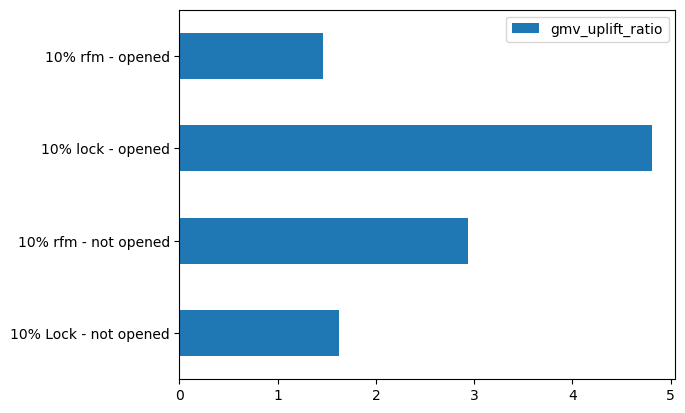

In [911]:
df1.plot.barh()

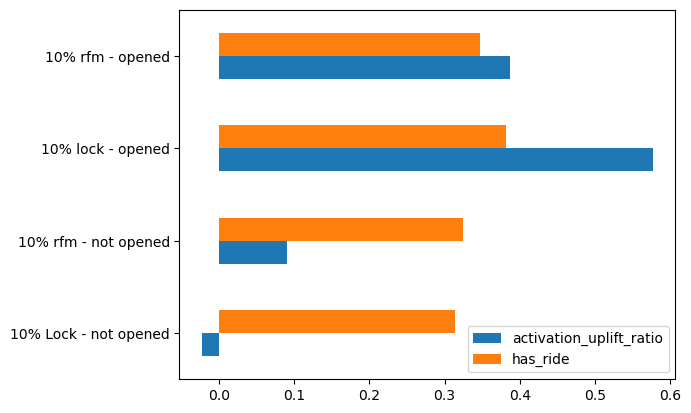

In [912]:
df.plot.barh()

## HOLDOUT PERIOD ANALYSIS - 2 weeks DP, 1 week HP

In [915]:
#get data first
campaign_start = '2020-12-03'
campaign_end = '2020-12-16'
city = 'Durban'
dfa = utils.read_from_redshift(sql_combined.format(
        campaign_start,
        campaign_end,
        city))

query started at: 15:54:06.947681
query ended at: 15:54:31.642811


In [916]:
dft_hp = dfa.merge(dfc, how = 'left', on = 'user_id')

dft_hp["campaign_percentage"] = dft_hp["campaign_percentage"].astype(str)
dft_hp["treatment"] = np.where((dft_hp["is_control"]==1),'control',dft_hp["campaign_percentage"])

dft_hp["treatment"] = np.where((dft_hp["treatment"]=='nan'),'no_treatment',dft_hp["treatment"])

In [917]:
#add campaign name to treatment! 
dft_hp['treatment2'] = dft_hp['campaign_name'].astype(str) + '_' + dft_hp['treatment'].astype(str)
dft_hp['treatment2'].unique()

array(['ZA, Durban, 2020W49, unlockable lock test, -20% x 10 (12 ZAR)_20',
       'ZA, Durban, 2020W49, unlockable rfm test, -20% x 10 (12 ZAR)_20',
       'ZA, Durban, 2020W49, unlockable lock test, -10% x 10 (6 ZAR)_10',
       'None_control',
       'ZA, Durban, 2020W49, unlockable lock test, -30% x 10 (18 ZAR)_30',
       'ZA, Durban, 2020W49, unlockable rfm test, -30% x 10 (18 ZAR)_30',
       'ZA, Durban, 2020W49, unlockable rfm test, -10% x 10 (6 ZAR)_10'],
      dtype=object)

In [920]:
#aggregate, calc efficiency, add p-values

fields = ['cohort', 'treatment2']
control_name = 'None_control' #name of the control group in groupby_1 array

#set names for aggregations and calcs
groupby_treatment = dft_hp[fields[1]].unique()#this feature includes control group, "treatment"
groupby_2 = dft_hp[fields[0]].unique() #additional groupby field, cohort, country etc
                
                
dfs = pd.DataFrame({
    "user_count":dft_hp.groupby(fields)["user_id"].count(),
    "has_ride_sum":dft_hp.groupby(fields)["hp_has_ride"].sum(),
    "has_ride_avg":dft_hp.groupby(fields)["hp_has_ride"].mean(), 
    
    "discount_all_avg":dft_hp.groupby(fields)["discount_all_sum"].mean(),
    #"discount_sum":dft.groupby(fields)["discount_sum"].sum(),
    "discount_avg":dft_hp.groupby(fields)["discount_sum"].mean(),

    #"gmv_sum":dft.groupby(fields)["ride_price_sum"].sum(),
    "gmv_avg":dft_hp.groupby(fields)["hp_ride_price_sum"].mean(),
    
    #"nmv_sum":dft.groupby(fields)["price_sum"].sum(),
    "nmv_avg":dft_hp.groupby(fields)["hp_price_sum"].mean(), 
    
    #"finished_order_sum":dft.groupby(fields)["finished_order_count"].sum(),
    "finished_order_avg":dft_hp.groupby(fields)["hp_finished_order_count"].mean()

}).reset_index()

#add control metrics to df
dfs_control = dfs[dfs[fields[1]]==control_name][[fields[0],"gmv_avg","has_ride_avg","discount_avg"]]
dfs_control = dfs_control.rename(columns = {"gmv_avg":"control_gmv_avg",
                                            "has_ride_avg":"control_has_ride_avg",
                                            "discount_avg":"control_discount_avg"
                                           })
dfs = dfs.merge(dfs_control, how = 'left', on = [fields[0]])

#calculate efficiency
dfs["gmv_uplift"]= np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["gmv_avg"]-dfs["control_gmv_avg"])

dfs["gmv_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["gmv_uplift"]/dfs["discount_avg"])

dfs["activation_uplift"] = np.where(dfs[fields[1]]==control_name,
                        np.nan,
                        dfs["has_ride_avg"]-dfs["control_has_ride_avg"])

dfs["activation_uplift_ratio"]=np.where(dfs[fields[1]]==control_name,
                            np.nan,
                            dfs["activation_uplift"]/dfs["discount_avg"])

#merge testgroup names
#dfs = pd.merge(dfs, testgroups, how = "left", left_on = "treatment", right_on= "treatment_name")

#p-value for AB
#fields in user level dataset
fields_p = ["discount_sum","ride_price_sum","price_sum","finished_order_count","has_ride"]


for group in groupby_2:
    for treatment in groupby_treatment: 
        for field in fields_p:
            p=ttest_2(dft_hp[(dft_hp[fields[1]]==control_name)&(dft_hp[fields[0]] == group)][field],
                      dft_hp[(dft_hp[fields[1]]==treatment)&(dft_hp[fields[0]] == group)][field])[1]
            p = round(p,4)
            #rename some fields
            if field == "ride_price_sum": field = "gmv_sum"
            if field == "price_sum": field = "nmv_sum"
            #print(country + ' ' + treatment + ' ' + field + ' {}'.format(p))
            dfs.loc[(dfs[fields[1]]==treatment)&(dfs[fields[0]]==group), str(field) + ' p-val'] = p

In [936]:
dfs

,cohort,treatment2,user_count,has_ride_sum,has_ride_avg,discount_all_avg,discount_avg,gmv_avg,nmv_avg,finished_order_avg,control_gmv_avg,control_has_ride_avg,control_discount_avg,gmv_uplift,gmv_uplift_ratio,activation_uplift,activation_uplift_ratio,discount_sum p-val,gmv_sum p-val,nmv_sum p-val,finished_order_count p-val,has_ride p-val,significance
0,high_frequency,None_control,3201,697,0.218,0.001,0.000,1.352,1.352,0.388,1.352,0.218,0.000,nan,nan,nan,nan,nan,1.000,1.000,1.000,1.000,red
1,high_frequency,"ZA, Durban, 2020W49, unlockable lock test, -10...",3174,679,0.214,0.182,0.092,1.503,1.502,0.447,1.352,0.218,0.000,0.151,1.641,-0.004,-0.041,0.000,0.000,0.002,0.000,0.002,green
2,high_frequency,"ZA, Durban, 2020W49, unlockable lock test, -20...",3292,703,0.214,0.345,0.209,1.348,1.348,0.405,1.352,0.218,0.000,-0.004,-0.018,-0.004,-0.020,0.000,0.000,0.053,0.000,0.006,green
3,high_frequency,"ZA, Durban, 2020W49, unlockable lock test, -30...",3305,716,0.217,0.622,0.356,1.446,1.443,0.419,1.352,0.218,0.000,0.094,0.264,-0.001,-0.003,0.000,0.000,0.000,0.000,0.000,green
4,high_frequency,"ZA, Durban, 2020W49, unlockable rfm test, -10%...",3325,700,0.211,0.194,0.088,1.488,1.486,0.410,1.352,0.218,0.000,0.136,1.549,-0.007,-0.082,0.000,0.000,0.021,0.001,0.021,green
5,high_frequency,"ZA, Durban, 2020W49, unlockable rfm test, -20%...",3207,654,0.204,0.454,0.205,1.294,1.294,0.380,1.352,0.218,0.000,-0.058,-0.283,-0.014,-0.067,0.000,0.000,0.002,0.000,0.000,green
6,high_frequency,"ZA, Durban, 2020W49, unlockable rfm test, -30%...",3314,701,0.212,0.810,0.368,1.379,1.379,0.404,1.352,0.218,0.000,0.027,0.074,-0.006,-0.017,0.000,0.000,0.000,0.000,0.000,green
7,high_recency,None_control,3184,593,0.186,0.005,0.000,1.210,1.207,0.339,1.210,0.186,0.000,nan,nan,nan,nan,nan,1.000,1.000,1.000,1.000,red
8,high_recency,"ZA, Durban, 2020W49, unlockable lock test, -10...",3163,553,0.175,0.147,0.089,1.090,1.088,0.307,1.210,0.186,0.000,-0.120,-1.355,-0.011,-0.129,0.000,0.058,0.384,0.014,0.000,red
9,high_recency,"ZA, Durban, 2020W49, unlockable lock test, -20...",3034,595,0.196,0.335,0.210,1.336,1.336,0.356,1.210,0.186,0.000,0.127,0.603,0.010,0.047,0.000,0.000,0.001,0.000,0.000,green


In [922]:
dfs.to_csv('hp_unlockable_pvals_v2.csv')

In [930]:
dfs['significance'] = np.where(dfs['gmv_sum p-val'] <= 0.05, 'green', 'red')

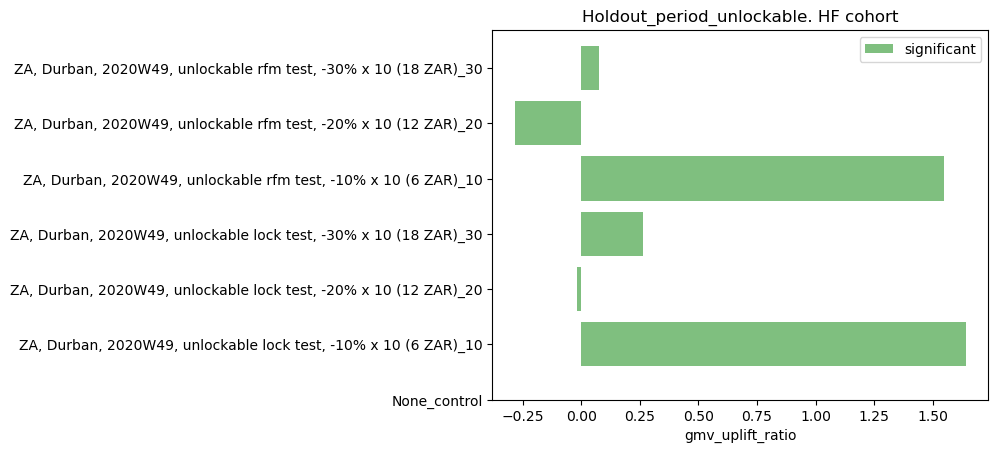

In [941]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'high_frequency']['treatment2']
significance = dfs[dfs['cohort'] == 'high_frequency']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'high_frequency']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = "green")
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('Holdout_period_unlockable. HF cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

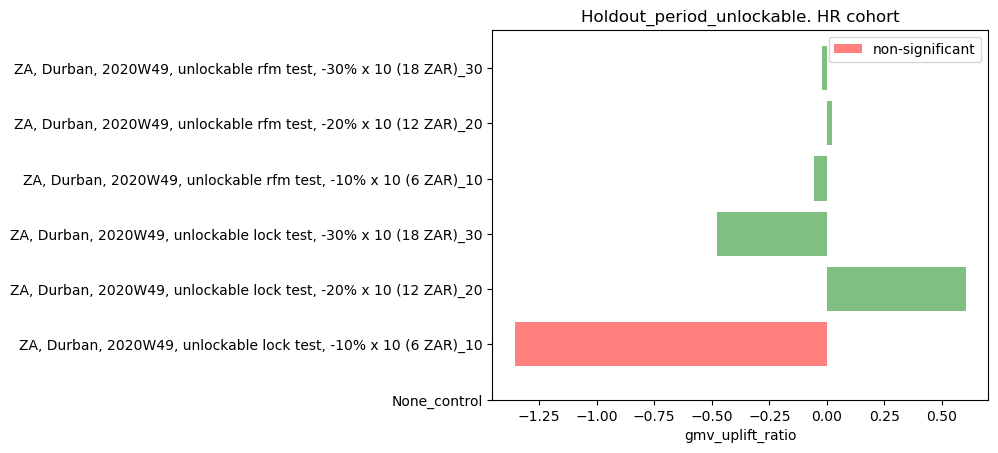

In [942]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'high_recency']['treatment2']
significance = dfs[dfs['cohort'] == 'high_recency']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'high_recency']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = significance)
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('Holdout_period_unlockable. HR cohort')
plt.legend(['non-significant'], loc = 'upper right')

plt.show()

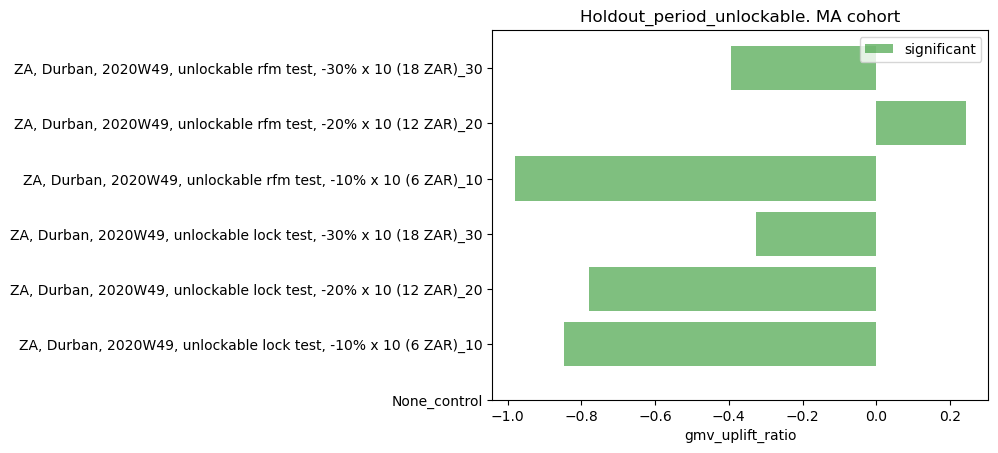

In [943]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dfs[dfs['cohort'] == 'med_activity']['treatment2']
significance = dfs[dfs['cohort'] == 'med_activity']['significance']
y_pos = np.arange(len(objects))
performance = dfs[dfs['cohort'] == 'med_activity']['gmv_uplift_ratio']
plt.barh(y_pos, performance, align='center', alpha=0.5, color = 'green')
plt.yticks(y_pos, objects)
plt.xlabel('gmv_uplift_ratio')
plt.title('Holdout_period_unlockable. MA cohort')
plt.legend(['significant'], loc = 'upper right')

plt.show()

## PLAYGROUND

In [562]:
dft_w1.head()

,user_id,test_id,test_name,campaign_name,treatment_type,is_control,targeted_campaign_id,campaign_percentage,campaign_max_value,is_in_holdout,finished_order_count,ride_price_sum,price_sum,discount_sum,discount_all_sum,has_ride,hp_finished_order_count,hp_ride_price_sum,hp_price_sum,hp_discount_sum,hp_discount_all_sum,hp_has_ride,method,period,city,country,cohort,treatment,treatment2
0,221787,13972,"ZA, Durban, 2020W49, unlockable lock test, HR","ZA, Durban, 2020W49, unlockable lock test, -20...",treatment,0,20076.000,20.0,12.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_recency,20.0,"ZA, Durban, 2020W49, unlockable lock test, -20..."
1,586685,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable rfm test, -20%...",treatment,0,20079.000,20.0,12.000,1,0,0.000,0.000,0.000,0.000,0,3,10.411,9.585,0.000,0.826,1,rfmv2,2020-12-02,Durban,za,high_frequency,20.0,"ZA, Durban, 2020W49, unlockable rfm test, -20%..."
2,606016,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -10...",treatment,0,20075.000,10.0,6.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,10.0,"ZA, Durban, 2020W49, unlockable lock test, -10..."
3,627586,13973,"ZA, Durban, 2020W49, unlockable lock test, HF",NaN,control,1,nan,nan,nan,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,control,nan_control
4,640794,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -30...",treatment,0,20077.000,30.0,18.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,30.0,"ZA, Durban, 2020W49, unlockable lock test, -30..."


In [559]:
dft_2w.head()

,user_id,test_id,test_name,campaign_name,treatment_type,is_control,targeted_campaign_id,campaign_percentage,campaign_max_value,is_in_holdout,finished_order_count,ride_price_sum,price_sum,discount_sum,discount_all_sum,has_ride,hp_finished_order_count,hp_ride_price_sum,hp_price_sum,hp_discount_sum,hp_discount_all_sum,hp_has_ride,method,period,city,country,cohort,treatment,treatment2
0,586685,14288,"ZA, Durban, 2020W50, unlockable rfm test, -20%...","ZA, Durban, 2020W50, unlockable rfm test, -20%...",treatment,0,20540,20,12,0,2,4.239,3.413,0.826,0.826,1,nan,nan,nan,nan,nan,nan,rfmv2,2020-12-02,Durban,za,high_frequency,20,"ZA, Durban, 2020W50, unlockable rfm test, -20%..."
1,658942,14288,"ZA, Durban, 2020W50, unlockable rfm test, -20%...","ZA, Durban, 2020W50, unlockable rfm test, -20%...",treatment,0,20540,20,12,0,0,0.000,0.000,0.000,0.000,0,nan,nan,nan,nan,nan,nan,rfmv2,2020-12-02,Durban,za,high_frequency,20,"ZA, Durban, 2020W50, unlockable rfm test, -20%..."
2,668321,14289,"ZA, Durban, 2020W50, unlockable rfm test, -30%...","ZA, Durban, 2020W50, unlockable rfm test, -30%...",treatment,0,20542,30,18,0,1,7.964,6.982,0.982,0.982,1,nan,nan,nan,nan,nan,nan,rfmv2,2020-12-02,Durban,za,high_frequency,30,"ZA, Durban, 2020W50, unlockable rfm test, -30%..."
3,696858,14373,"ZA, Durban, 2020W50, unlockable rfm test, -10%...","ZA, Durban, 2020W50, unlockable rfm test, -10%...",treatment,0,20538,10,6,0,0,0.000,0.000,0.000,0.000,0,nan,nan,nan,nan,nan,nan,rfmv2,2020-12-02,Durban,za,high_frequency,10,"ZA, Durban, 2020W50, unlockable rfm test, -10%..."
4,706812,14289,"ZA, Durban, 2020W50, unlockable rfm test, -30%...","ZA, Durban, 2020W50, unlockable rfm test, -30%...",treatment,0,20542,30,18,0,0,0.000,0.000,0.000,0.000,0,nan,nan,nan,nan,nan,nan,rfmv2,2020-12-02,Durban,za,high_frequency,30,"ZA, Durban, 2020W50, unlockable rfm test, -30%..."


In [802]:
dft.treatment2.unique()

array(['nan_control',
       'ZA, Durban, 2020W50, unlockable rfm test, -20% x 10 (12 ZAR)_20',
       'ZA, Durban, 2020W50, unlockable rfm test, -30% x 10 (18 ZAR)_30',
       'ZA, Durban, 2020W50, unlockable rfm test, -10% x 10 (6 ZAR)_10',
       'ZA, Durban, 2020W50, unlockable lock test, -40% x 10 (24 ZAR)_40',
       'ZA, Durban, 2020W50, unlockable lock test, -30% x 10 (18 ZAR)_30',
       'ZA, Durban, 2020W50, unlockable lock test, -20% x 10 (12 ZAR)_20'],
      dtype=object)

In [765]:
dft.head()

,user_id,finished_order_count,ride_price_sum,price_sum,discount_all_sum,has_ride,method,period,city,country,cohort,treatment2,test_id,test_name,campaign_name,treatment_type,is_control,targeted_campaign_id,campaign_percentage,campaign_max_value,is_in_holdout,discount_sum,hp_finished_order_count,hp_ride_price_sum,hp_price_sum,hp_discount_sum,hp_discount_all_sum,hp_has_ride,treatment
0,627586,0,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,nan_control,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
1,698366,0,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,nan_control,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
2,757406,0,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,med_activity,nan_control,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
3,767696,0,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_recency,nan_control,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
4,823957,0,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,nan_control,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN


In [806]:
dft_hp.head()

,user_id,test_id,test_name,campaign_name,treatment_type,is_control,targeted_campaign_id,campaign_percentage,campaign_max_value,is_in_holdout,finished_order_count,ride_price_sum,price_sum,discount_sum,discount_all_sum,has_ride,hp_finished_order_count,hp_ride_price_sum,hp_price_sum,hp_discount_sum,hp_discount_all_sum,hp_has_ride,method,period,city,country,cohort,treatment,treatment2
0,221787,13972,"ZA, Durban, 2020W49, unlockable lock test, HR","ZA, Durban, 2020W49, unlockable lock test, -20...",treatment,0,20076.000,20.0,12.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_recency,20.0,"ZA, Durban, 2020W49, unlockable lock test, -20..."
1,586685,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable rfm test, -20%...",treatment,0,20079.000,20.0,12.000,1,0,0.000,0.000,0.000,0.000,0,3,10.411,9.585,0.000,0.826,1,rfmv2,2020-12-02,Durban,za,high_frequency,20.0,"ZA, Durban, 2020W49, unlockable rfm test, -20%..."
2,606016,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -10...",treatment,0,20075.000,10.0,6.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,10.0,"ZA, Durban, 2020W49, unlockable lock test, -10..."
3,627586,13973,"ZA, Durban, 2020W49, unlockable lock test, HF",NaN,control,1,nan,nan,nan,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,control,nan_control
4,640794,13973,"ZA, Durban, 2020W49, unlockable lock test, HF","ZA, Durban, 2020W49, unlockable lock test, -30...",treatment,0,20077.000,30.0,18.000,1,0,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0,rfmv2,2020-12-02,Durban,za,high_frequency,30.0,"ZA, Durban, 2020W49, unlockable lock test, -30..."
